# Unveiling Business Success: Analyzing an E-commerce Website Using Key KPIs #

### Shoppers Intention Via Website Traffic Analysis

    The E-commerce website is developed to create a medium where shoppers buy goods and services without a necessary physical interaction, hence, it is necessary to understand the intentions of visitors to the website.
    
    A proper understanding of the shoppers' habit will help to improve the human-website interface, making it attractive and easy to navigate for the visitors, also knowing what the shoppers come looking for.
    
    It is also necessary for the business no be able to predict the purchace intention to properly channel there campaigns correctly aiding to maximize the revenue potential of the website.

In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Data preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  #helps to normalizes data between zero an one

# Classifiers libraries i.e machine learning algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder

import xgboost

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
# import data
data = pd.read_csv(r"C:\Users\HP ELITEBOOK 1040\Desktop\DATA ANALYSIS\INTERNSHIP\Online Shoppers Intention\online_shoppers_intention.csv")
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

## Data Dictionary

- Administrative: This is the number of pages of this type (administrative) that the user visited.
- Administrative_Duration: This is the amount of time spent in this category of pages.
- Informational: This is the number of pages of this type (informational) that the user visited.
- Informational_Duration: This is the amount of time spent in this category of pages.
- ProductRelated: This is the number of pages of this type (product related) that the user visited.
- ProductRelated_Duration: This is the amount of time spent in this category of pages.
- BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks. This feature typically represents the rate at which visitors leave a website after viewing a single page.
- ExitRates: The percentage of pageviews on the website that end at that specific page. This feature generally represents the rate at which visitors leave a website after viewing multiple pages
- PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
- More information about how this is calculated
- SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.
- Month: Contains the month the pageview occurred, in string form.
- OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.
- Browser: An integer value representing the browser that the user was using to view the page.
- Region: An integer value representing which region the user is located in.
- TrafficType: An integer value representing what type of traffic the user is categorized into.
- VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
- Weekend: A boolean representing whether the session is on a weekend.
- Revenue: A boolean representing whether or not the user completed the purchase.


In [3]:
data.describe(include=['bool'])

Weekend Revenue
count    12330   12330
unique       2       2
top      False   False
freq      9462   10422

In [4]:
data.describe(include=['object'])

Month        VisitorType
count   12330              12330
unique     10                  3
top       May  Returning_Visitor
freq     3364              10551

In [5]:
data.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [6]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

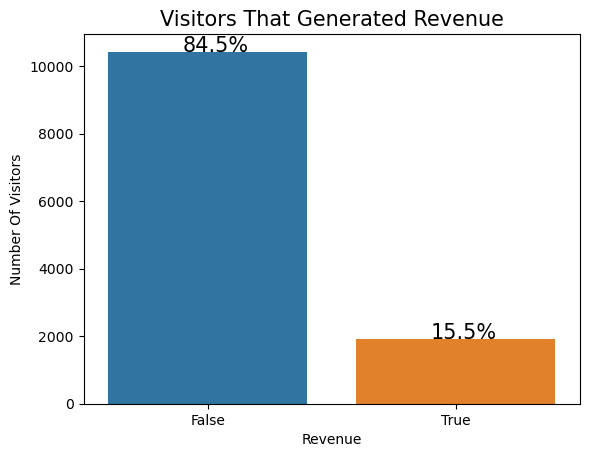

In [7]:
ax=sns.countplot(x='Revenue', data=data)

plt.xlabel('Revenue', size=10)
plt.ylabel('Number Of Visitors', size =10)
plt.title('Visitors That Generated Revenue', size=15)

# Calculate percentages
total = float(len(data['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=15)
    


plt.show()

### Narration
- 84.5% of website visitors did not generate revenue, while 15.5% of the visitors generated revenue.

### Analysis Of The Pages

Text(0.5, 1.0, 'Product Related Page Distribution')

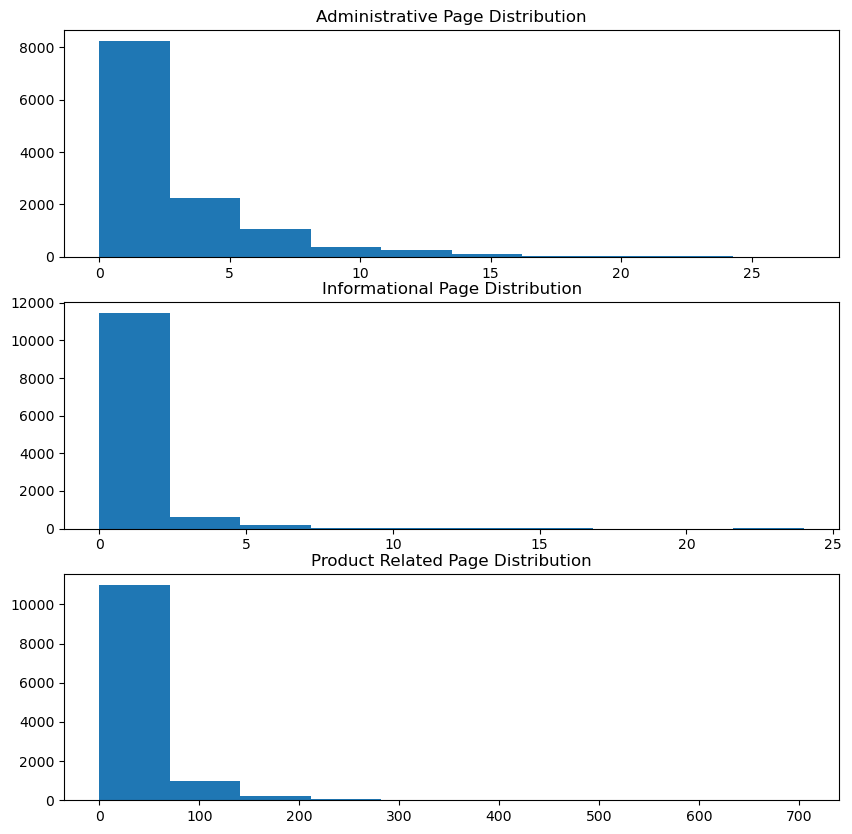

In [8]:
fig, axs = plt.subplots(3, 1, figsize = (10,10))
axs[0].hist(data["Administrative"])
axs[0].set_title("Administrative Page Distribution")

axs[1].hist(data["Informational"])
axs[1].set_title("Informational Page Distribution")

axs[2].hist(data["ProductRelated"])
axs[2].set_title("Product Related Page Distribution")



### Observation

The distribution of visitors visiting the different sections of the pages is concentrated on the left, skewing to the right.

In [9]:
#### Binning the Administrative pages

# categorizing age

def admin_bracket(admin):
    if admin <= 5:
        return '0-5 Pages'
    elif admin <= 10:
        return '6-10 Pages'
    elif admin <= 15:
        return '11-15 Pages'
    elif admin <= 20:
        return '16-20 Pages'
    else:
        return '>20 Pages'
    
data['admin_bracket'] = data['Administrative'].apply(admin_bracket)
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor    False    False   
1        2       1            2  Returning_Visitor    False    False   
2        1       9            3  Returning_Visitor    False    False   
3        2       2            4  Returning_Visitor    False    False   
4        3       1            4  Returning_Visitor     True    False   

  admin_bracket  
0     0-5 Pages  
1     0-5 Pages  
2     0-5 Pages  
3     0-5 Pages  
4     0-5 Pages

In [10]:
#### Binning the Product Related pages

# categorizing age

def pdt_bracket(pdt):
    if pdt <= 150:
        return '0-150 Pages'
    elif pdt <= 300:
        return '151-300 Pages'
    elif pdt <= 450:
        return '301-450 Pages'
    elif pdt <= 600:
        return '451-600 Pages'
    else:
        return '>600 Pages'
    
data['pdt_bracket'] = data['ProductRelated'].apply(pdt_bracket)
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0        1       1            1  Returning_Visitor    False    False   
1        2       1            2  Returning_Visitor    False    False   
2        1       9            3  Returning_Visitor    False    False   
3        2       2            4  Returning_Visitor    False    False   
4        3       1            4  Returning_Visitor     True    False   

  admin_bracket  pdt_bracket  
0     0-5 Pages  0-150 Pages  
1     0-5 Pages  0-150 Pages  
2     0-5 Pages  0-150 Pages  
3     0-5 Pages  0-150 Pages  
4     0-5 Pages  0-150 Pages

In [11]:
#### Binning the Informational pages

# categorizing age

def info_bracket(info):
    if info <= 5:
        return '0-5 Pages'
    elif info <= 10:
        return '6-10 Pages'
    elif info <= 15:
        return '11-15 Pages'
    elif info <= 20:
        return '16-20 Pages'
    else:
        return '>21 Pages'
    
data['info_bracket'] = data['Informational'].apply(info_bracket)
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ... OperatingSystems  \
0         0.20       0.20         0.0         0.0  ...                1   
1         0.00       0.10         0.0         0.0  ...                2   
2         0.20       0.20         0.0         0.0  ...                4   
3         0.05       0.14         0.0         0.0  ...                3   
4         0.02       0.05         0.0         0.0  ...                3   

   Browser  Region  TrafficType        VisitorType Weekend  Revenue  \
0        1       1            1  Returning_Visitor   False    False   
1        2       1            2  Returning_Visitor   False    False   
2        1       9            3  Returning_Visitor   False    False   
3        2       2            4  Returning_Visitor   False    False   
4        3       1            4  Returning_Visitor    True    False   

   admin_bracket  pdt_bracket info_bracket  
0      0-5 Pages  0-150 Pages    0-5 Pages  
1      0-5 Pages  0-150 Pages    0-5 Pages  
2      0-5 Pages  0-150 Pages    0-5 Pages  
3      0-5 Pages  0-150 Pages    0-5 Pages  
4      0-5 Pages  0-150 Pages    0-5 Pages  

[5 rows x 21 columns]

In [12]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
admin_bracket              0
pdt_bracket                0
info_bracket               0
dtype: int64

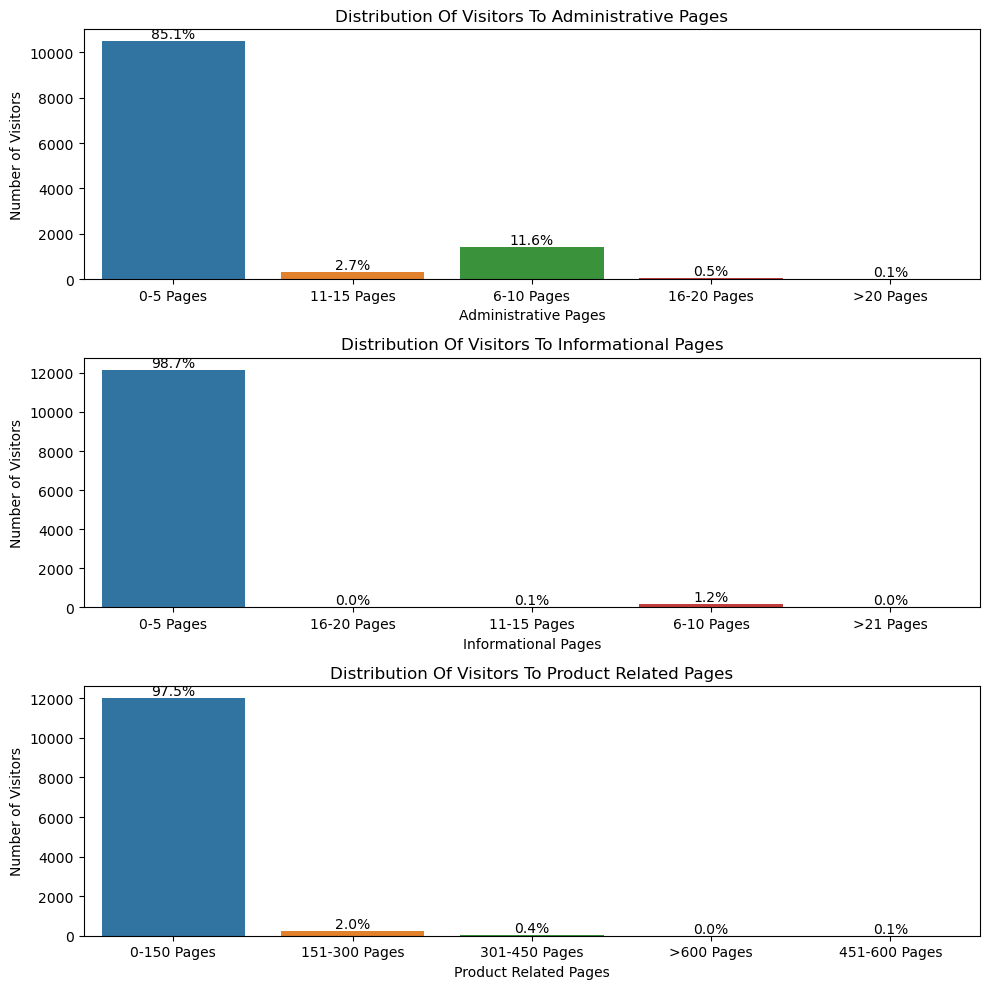

In [13]:
# Analyzing the number of visitors to the different pages 
fig, axes = plt.subplots(3, 1, figsize = (10,10))
sns.countplot(data=data, x='admin_bracket', ax=axes[0])
axes[0].set_title('Distribution Of Visitors To Administrative Pages')
axes[0].set_ylabel('Number of Visitors')
axes[0].set_xlabel('Administrative Pages')

sns.countplot(data=data, x='info_bracket', ax=axes[1])
axes[1].set_title('Distribution Of Visitors To Informational Pages')
axes[1].set_ylabel('Number of Visitors')
axes[1].set_xlabel('Informational Pages')

sns.countplot(data=data, x='pdt_bracket', ax=axes[2])
axes[2].set_title('Distribution Of Visitors To Product Related Pages')
axes[2].set_ylabel('Number of Visitors')
axes[2].set_xlabel('Product Related Pages')


# Adding percentage labels to each bar
for ax in axes:
    total = len(data)  # Total number of data points
    for p in ax.patches:
        height = p.get_height()  # Height of the bar
        percentage = height / total * 100
        ax.text(p.get_x() + p.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Observations:
- It is observed that visitors largely don't surf through the website pages on all the three sections.

<AxesSubplot:xlabel='PageValues', ylabel='Count'>

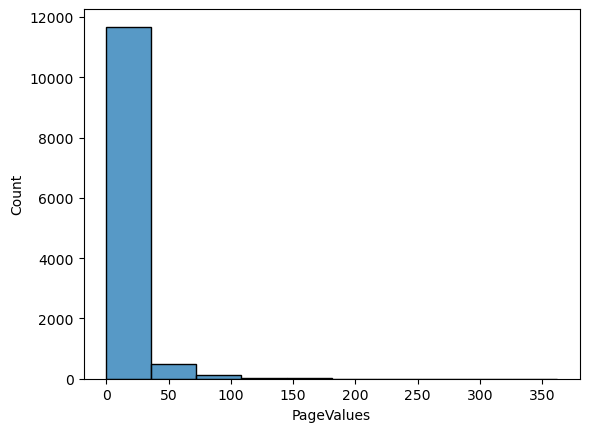

In [14]:
# The distribution of the page values
sns.histplot(data['PageValues'], bins=10)

### Observation
- The page value between 0 - 40 are highly visited, pages with these page values should be invested on to engage visitors in other to monetize them.
- Pages with higher page values are least visited, their should be a medium with which to entice customers to visiting these pages.

Text(0.5, 1.0, 'Relationship Between Page Values and Bounce Rates')

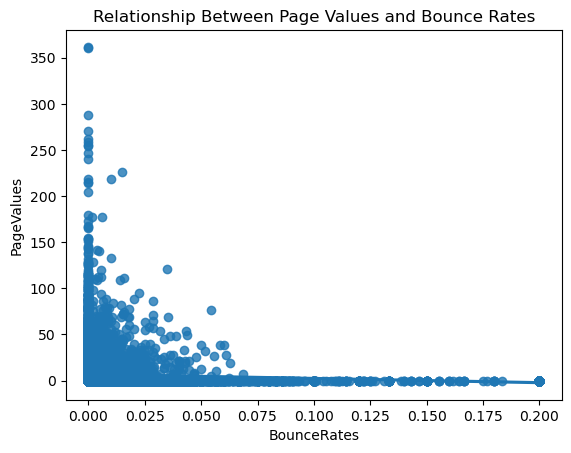

In [15]:
sns.regplot(x='BounceRates', y='PageValues', data=data)
plt.title('Relationship Between Page Values and Bounce Rates')

### Observation
- The relationship between the page value is neutral, that is neither of the features affect each other.
- There is a high concentration of visitors within the lower bounce rates and the lower page rate, this indicates that visitors spend more time on pages with lower page values.
- The business should in this regards improve the pages with lower page value to help them generate more revenue from these pages.

Text(0.5, 1.0, 'Relationship Between Page Values and Exit Rates')

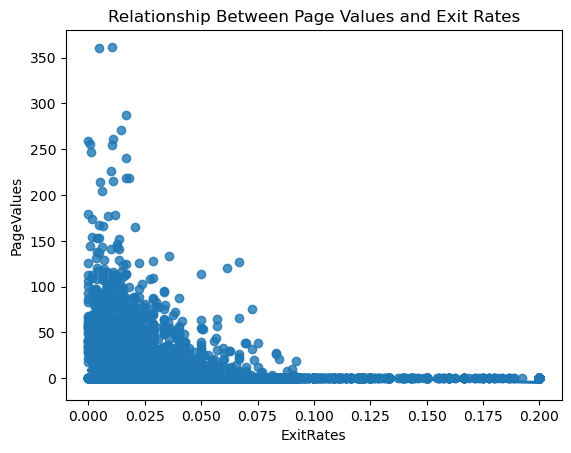

In [16]:
sns.regplot(x='ExitRates', y='PageValues', data=data)
plt.title('Relationship Between Page Values and Exit Rates')

### Observation
- The relationship between the page value and exit rate is neutral, that is neither of the features affect each other

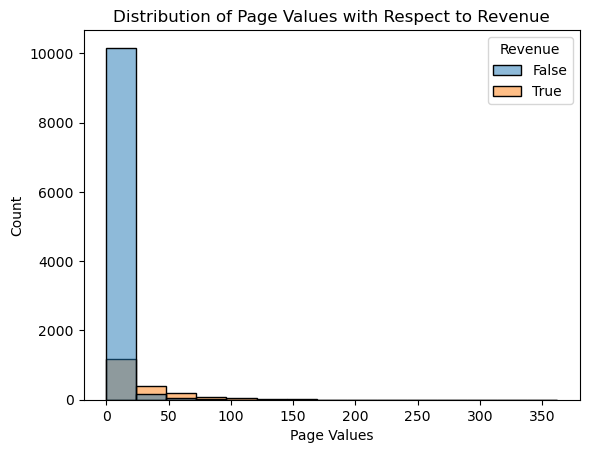

In [17]:
#Analyzing the the distribution of page values with respect to revenue
# Create a figure with subplots
fig, ax = plt.subplots()

# Plot the histogram
sns.histplot(data=data, x='PageValues', hue='Revenue', ax=ax)

# Add labels and title
ax.set_xlabel('Page Values')
ax.set_ylabel('Count')
ax.set_title('Distribution of Page Values with Respect to Revenue')

# Display the plot
plt.show()

### Observation
- Within the value 0- about 25, the page values at the range does not largely generate revenue.
- from about 25 - about 100, more pages in the range of values generated revenues.

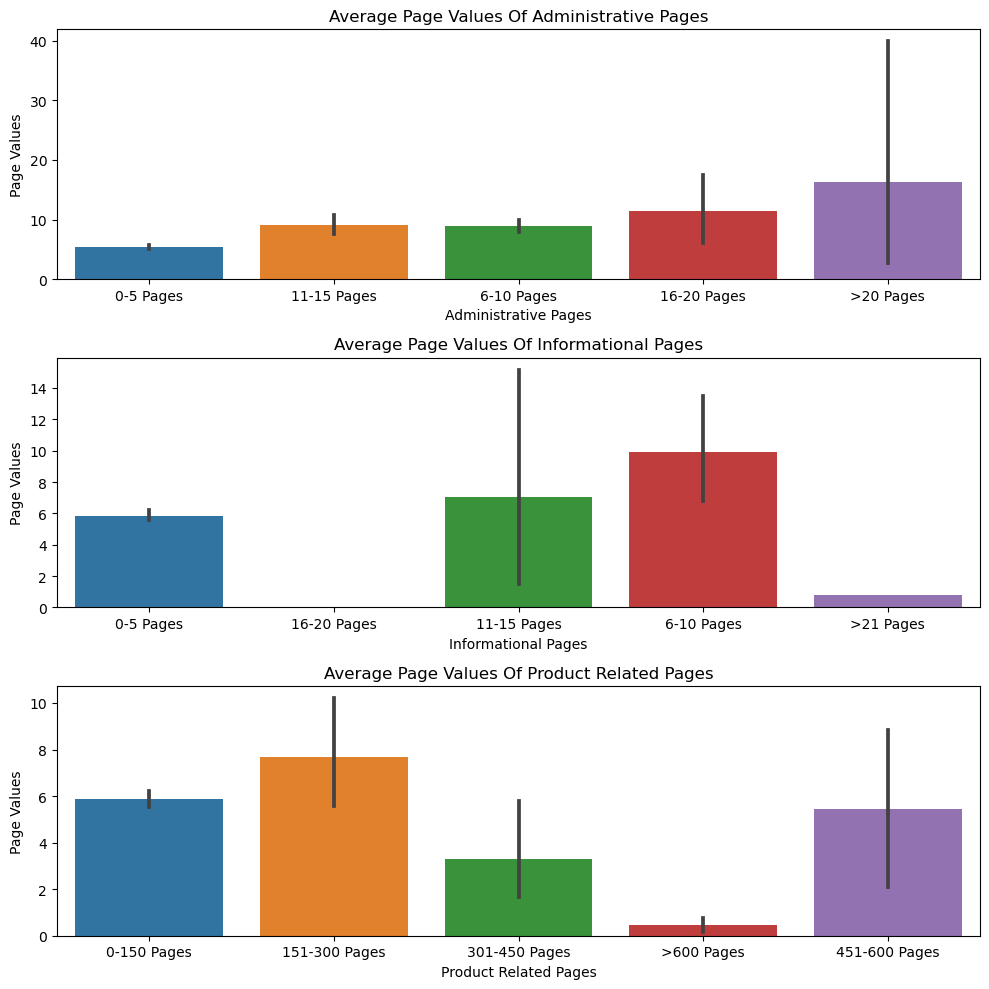

In [18]:
# Anlyzing the average page value of the different page groups
fig, axes = plt.subplots(3, 1, figsize = (10,10))
sns.barplot(data=data, x='admin_bracket',y='PageValues', ax=axes[0])
axes[0].set_title('Average Page Values Of Administrative Pages')
axes[0].set_ylabel('Page Values')
axes[0].set_xlabel('Administrative Pages')

sns.barplot(data=data, x='info_bracket',y='PageValues', ax=axes[1])
axes[1].set_title('Average Page Values Of Informational Pages')
axes[1].set_ylabel('Page Values')
axes[1].set_xlabel('Informational Pages')

sns.barplot(data=data, x='pdt_bracket',y='PageValues', ax=axes[2])
axes[2].set_title('Average Page Values Of Product Related Pages')
axes[2].set_ylabel('Page Values')
axes[2].set_xlabel('Product Related Pages')


plt.tight_layout()
plt.show()

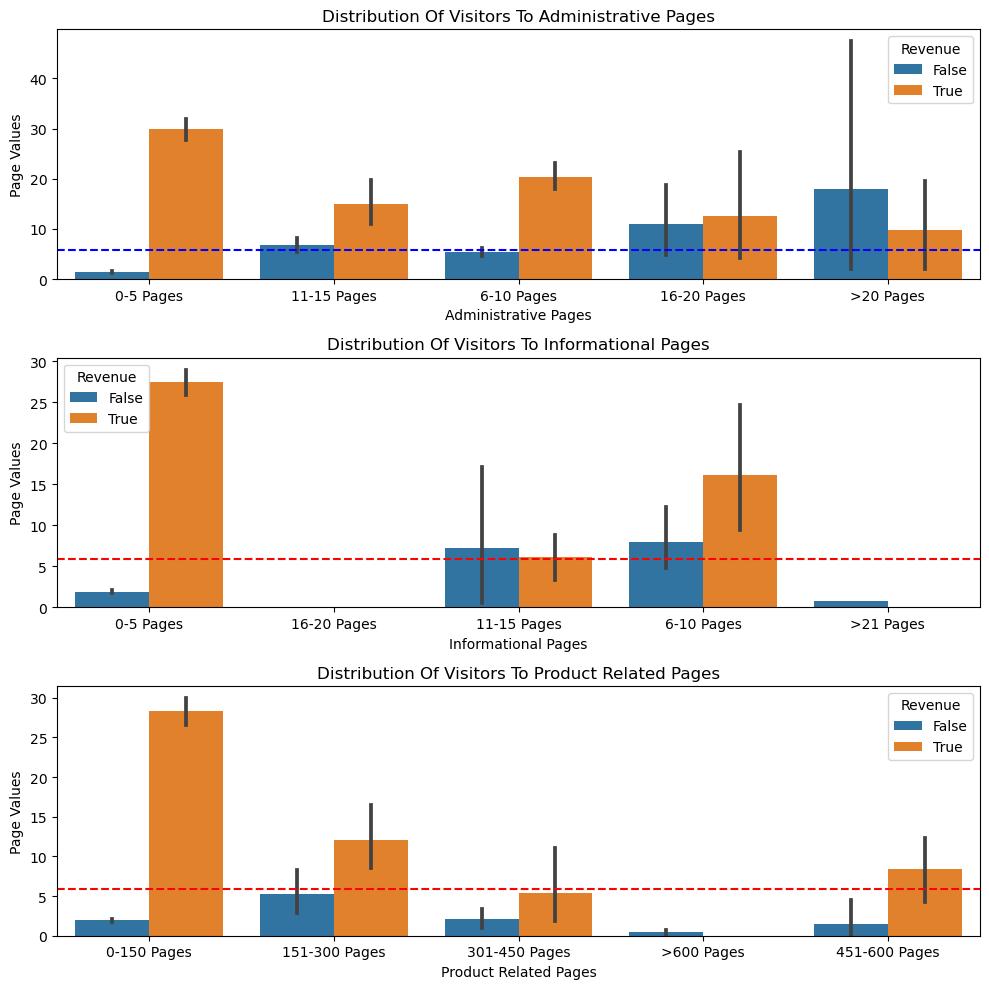

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Plotting the first subplot
sns.barplot(data=data, x='admin_bracket', y='PageValues', hue='Revenue', ax=axes[0])
average_value = data['PageValues'].mean()  # Calculating the average value
axes[0].axhline(y=average_value, color='b', linestyle='--', label='Average')
axes[0].set_title('Distribution Of Visitors To Administrative Pages')
axes[0].set_ylabel('Page Values')
axes[0].set_xlabel('Administrative Pages')

# Plotting the second subplot
sns.barplot(data=data, x='info_bracket', y='PageValues', hue='Revenue', ax=axes[1])
axes[1].axhline(y=average_value, color='r', linestyle='--', label='Average')
axes[1].set_title('Distribution Of Visitors To Informational Pages')
axes[1].set_ylabel('Page Values')
axes[1].set_xlabel('Informational Pages')

# Plotting the third subplot
sns.barplot(data=data, x='pdt_bracket', y='PageValues', hue='Revenue', ax=axes[2])
axes[2].axhline(y=average_value, color='r', linestyle='--', label='Average')
axes[2].set_title('Distribution Of Visitors To Product Related Pages')
axes[2].set_ylabel('Page Values')
axes[2].set_xlabel('Product Related Pages')

plt.tight_layout()
plt.show()


### Observations
- In administrative pages, the pages that generated revenue are above the average value of 5.88.
- Pages 0-5 in the informational page on the average requires about 28 page value to generate revenue. This also relates to the administrative and product related pages.

Text(0.5, 1.0, 'Average Range Of Page Value That Generate Revenue')

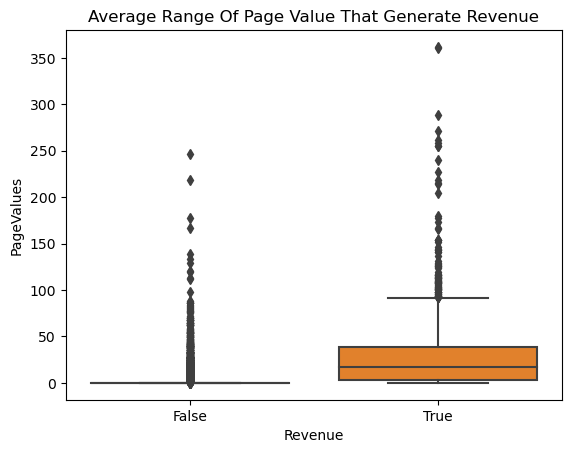

In [20]:
sns.boxplot(x='Revenue', y='PageValues', data=data)
plt.title('Average Range Of Page Value That Generate Revenue')

### Observation
- On the average of 25, pages generate revenue.
- Ranging from 0-100, pages are likely to generate revenue, and highly concentrated at the range 0- about 50.

Text(0.5, 1.0, 'Visitation on Special Days')

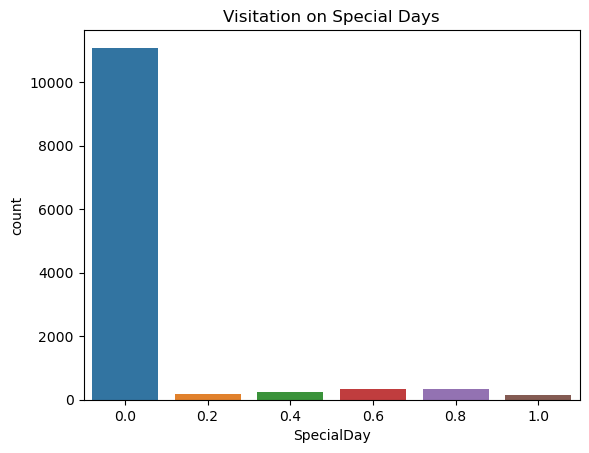

In [21]:
sns.countplot(x='SpecialDay', data=data)
plt.title('Visitation on Special Days')

### Observation
- Special days does not determine the traffic gotten on websites. Largest visitation was gotten when the proximity to special days was at 0.

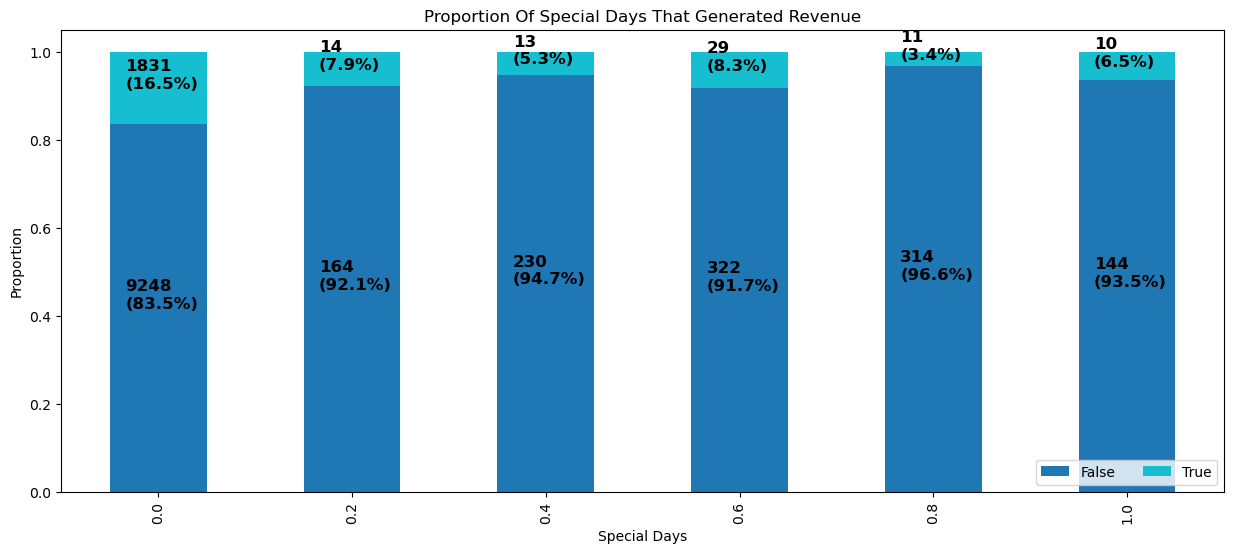

In [22]:
# The proportion of days that generated revenue 

# getting the percentage representaton of the special days and revenue column
cross_tab_sp = pd.crosstab(index=data['SpecialDay'],
                             columns=data['Revenue'],
                             normalize="index")
cross_tab_sp

# getting the count representaton of the special days and revenue
cross_sp = pd.crosstab(index=data['SpecialDay'],
                        columns=data['Revenue'])
cross_sp

# plotting the chart
cross_tab_sp.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(15, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Special Days")
plt.ylabel("Proportion")
plt.title('Proportion Of Special Days That Generated Revenue')


for n, x in enumerate([*cross_sp.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_sp.loc[x],
                                          cross_sp.loc[x],
                                          cross_tab_sp.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Observations
- Visitations on 0.0 scale of proximity to special days generate more revenue from 16.5% of the total visitations, which recorded the highest of all visitations that generated revenue.
- The least visitation that generated revenue was from the 0.8 scale of proximity with 3.4%.

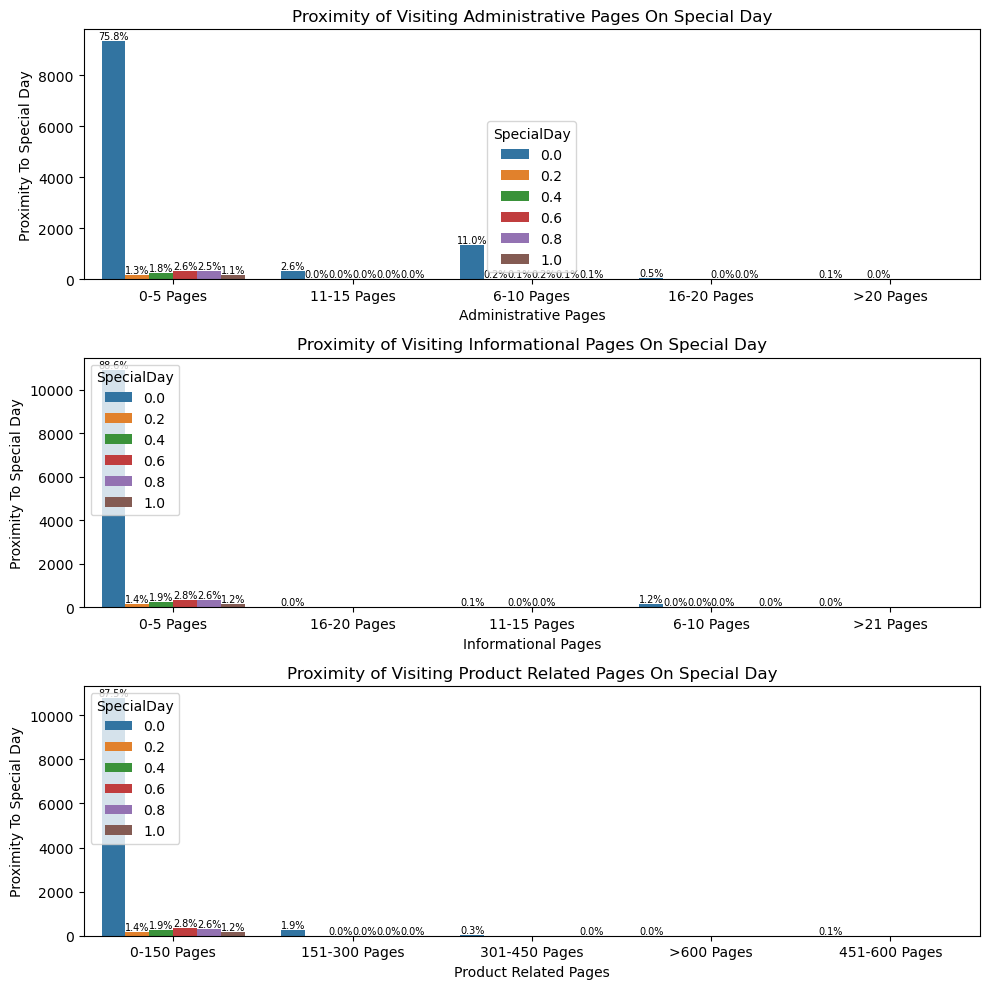

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
data = data  # Replace 'your_data' with the actual data you want to plot

# Plotting the first subplot
ax1 = sns.countplot(data=data, x='admin_bracket', hue='SpecialDay', ax=axes[0])
axes[0].set_title('Proximity of Visiting Administrative Pages On Special Day')
axes[0].set_ylabel('Proximity To Special Day')
axes[0].set_xlabel('Administrative Pages')

# Adding percentage text to the first subplot
total = len(data)  # Total count
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=7)

# Plotting the second subplot
ax2 = sns.countplot(data=data, x='info_bracket', hue='SpecialDay', ax=axes[1])
axes[1].set_title('Proximity of Visiting Informational Pages On Special Day')
axes[1].set_ylabel('Proximity To Special Day')
axes[1].set_xlabel('Informational Pages')

# Adding percentage text to the second subplot
total = len(data)  # Total count
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=7)

# Plotting the third subplot
ax3 = sns.countplot(data=data, x='pdt_bracket', hue='SpecialDay', ax=axes[2])
axes[2].set_title('Proximity of Visiting Product Related Pages On Special Day')
axes[2].set_ylabel('Proximity To Special Day')
axes[2].set_xlabel('Product Related Pages')

# Adding percentage text to the third subplot
total = len(data)  # Total count
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax3.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.show()


### Observations
- On special days accross the sections, surfing through numerous pages was mostly at 0%
- On the least number of pages surfed through on the sections, all the special days were represented with 0.0 proximity with the highest percentage >70% in all sections, with the 1.0 proximity the least in all cases.

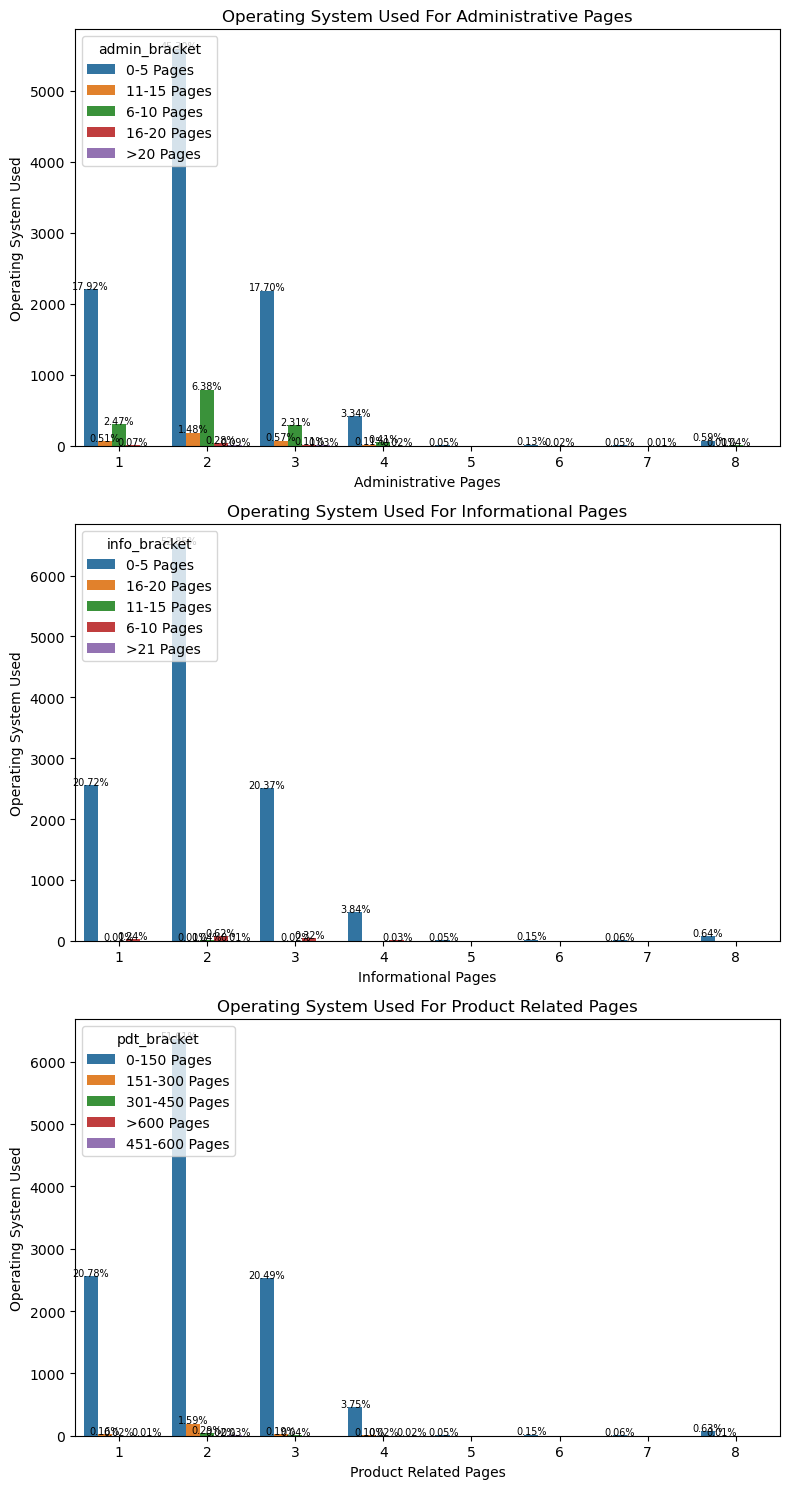

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(8, 15))
data = data  

# Plotting the first subplot
ax1 = sns.countplot(data=data, hue='admin_bracket', x='OperatingSystems', ax=axes[0])
axes[0].set_title('Operating System Used For Administrative Pages')
axes[0].set_ylabel('Operating System Used')
axes[0].set_xlabel('Administrative Pages')

total_height = len(data['OperatingSystems'])  # Total count for normalization

for p in ax1.patches:
    height = p.get_height()
    if np.isfinite(height):
        ax1.text(p.get_x() + p.get_width() / 2, height + 5, f'{height / total_height:.2%}', ha='center', fontsize=7)

# Plotting the second subplot
ax2 = sns.countplot(data=data, hue='info_bracket', x='OperatingSystems', ax=axes[1])
axes[1].set_title('Operating System Used For Informational Pages')
axes[1].set_ylabel('Operating System Used')
axes[1].set_xlabel('Informational Pages')

total_height = len(data['OperatingSystems'])  # Total count for normalization

for p in ax2.patches:
    height = p.get_height()
    if np.isfinite(height):
        ax2.text(p.get_x() + p.get_width() / 2, height + 5, f'{height / total_height:.2%}', ha='center', fontsize=7)

# Plotting the third subplot
ax3 = sns.countplot(data=data, hue='pdt_bracket', x='OperatingSystems', ax=axes[2])
axes[2].set_title('Operating System Used For Product Related Pages')
axes[2].set_ylabel('Operating System Used')
axes[2].set_xlabel('Product Related Pages')

total_height = len(data['OperatingSystems'])  # Total count for normalization

for p in ax3.patches:
    height = p.get_height()
    if np.isfinite(height):
        ax3.text(p.get_x() + p.get_width() / 2, height + 5, f'{height / total_height:.2%}', ha='center', fontsize=7)

plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='OperatingSystems', ylabel='count'>

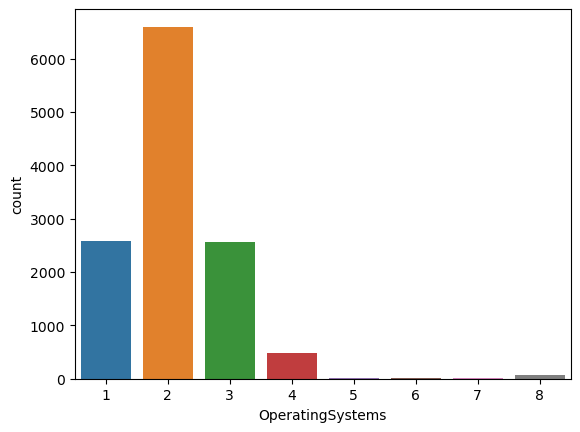

In [25]:
sns.countplot(x='OperatingSystems', data=data)

### Observation
- The '2' operating system was widely used by the visitors to the website.

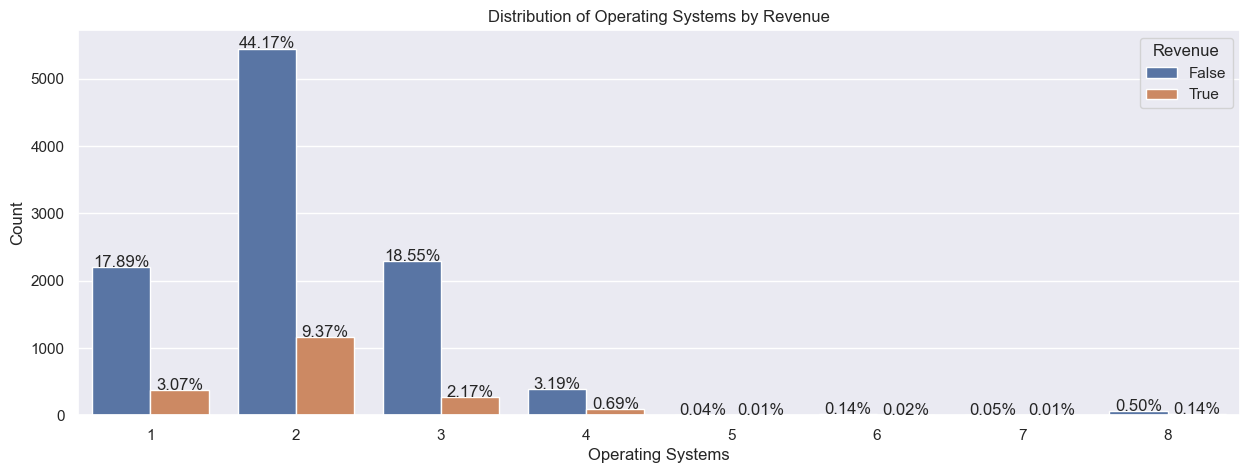

In [26]:
sns.set(style="darkgrid")  #Set the style of the plot

plt.figure(figsize=(15,5))
ax = sns.countplot(x='OperatingSystems', hue='Revenue', data=data)

total_height = len(data['OperatingSystems'])  # Total count for normalization

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total_height:.2%}', ha='center')

plt.xlabel('Operating Systems')
plt.ylabel('Count')
plt.title('Distribution of Operating Systems by Revenue')
plt.legend(title='Revenue', loc='upper right')

plt.show()


### Observation
- Users of operating system 2 made up 9.37% of visitors tha generated revenue

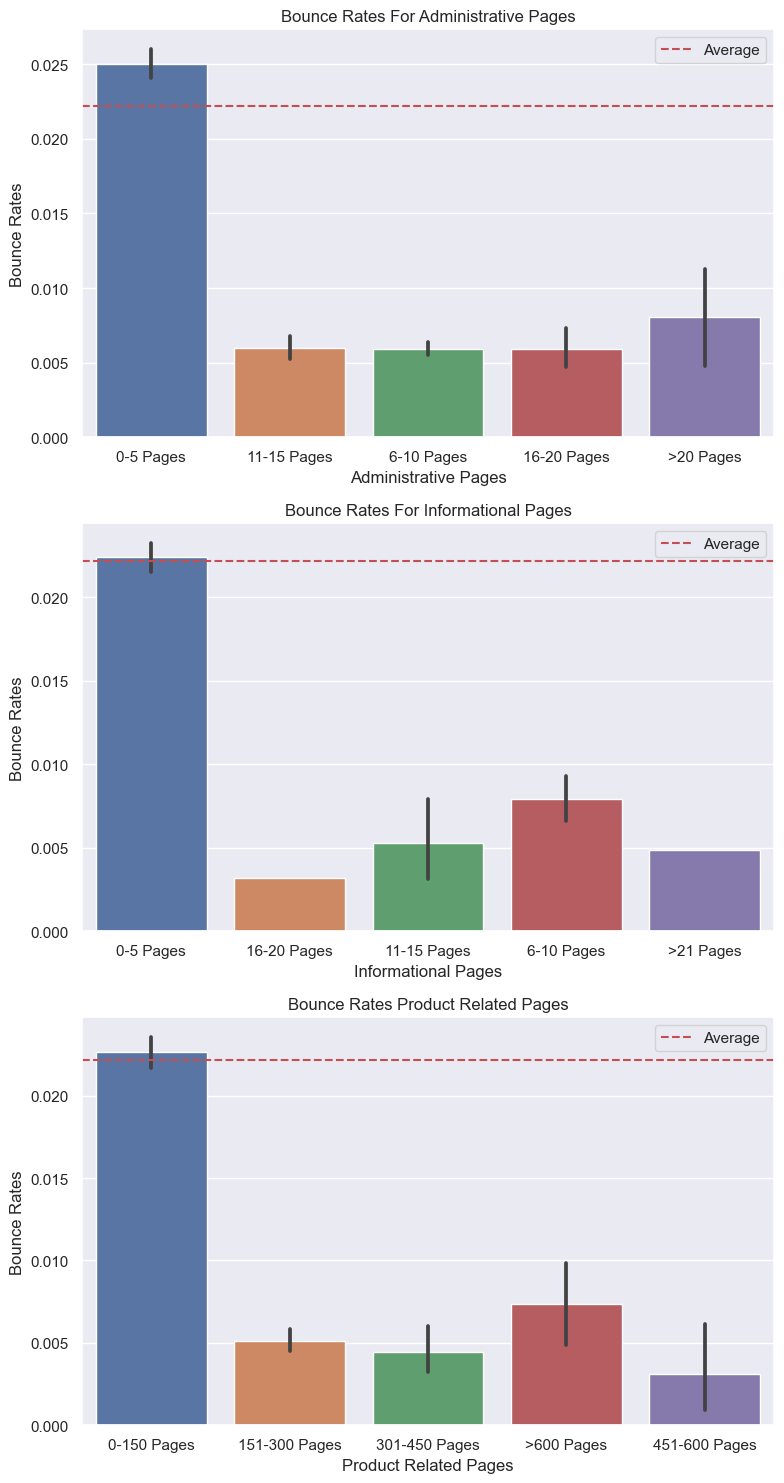

In [27]:
# Analyzing the average bounce rates for the pages of the different sections
import numpy as np

# Calculate the average bounce rate for each section
admin_avg = data['BounceRates'].mean()
info_avg = data['BounceRates'].mean()
pdt_avg = data['BounceRates'].mean()

# Analyzing the average bounce rates for the different sections
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

# Subplot 1
sns.barplot(data=data, x='admin_bracket', y='BounceRates', ax=axes[0])
axes[0].axhline(admin_avg, color='r', linestyle='--', label='Average')
axes[0].set_title('Bounce Rates For Administrative Pages')
axes[0].set_ylabel('Bounce Rates')
axes[0].set_xlabel('Administrative Pages')
axes[0].legend()

# Subplot 2
sns.barplot(data=data, x='info_bracket', y='BounceRates', ax=axes[1])
axes[1].axhline(info_avg, color='r', linestyle='--', label='Average')
axes[1].set_title('Bounce Rates For Informational Pages')
axes[1].set_ylabel('Bounce Rates')
axes[1].set_xlabel('Informational Pages')
axes[1].legend()

# Subplot 3
sns.barplot(data=data, x='pdt_bracket', y='BounceRates', ax=axes[2])
axes[2].axhline(pdt_avg, color='r', linestyle='--', label='Average')
axes[2].set_title('Bounce Rates Product Related Pages')
axes[2].set_ylabel('Bounce Rates')
axes[2].set_xlabel('Product Related Pages')
axes[2].legend()

plt.tight_layout()
plt.show()


### Observation
- The bounce rates for visiting more pages was lagely lower, this indicates that the more you surf through website pages, the likelyhood of having a lower bounce rate.
- In product related pages, the bounce rate for surfing through more than 600 pages was about 0.7% on the average, slightly higher than other pages asides 0-150 pages group of the product related pages.

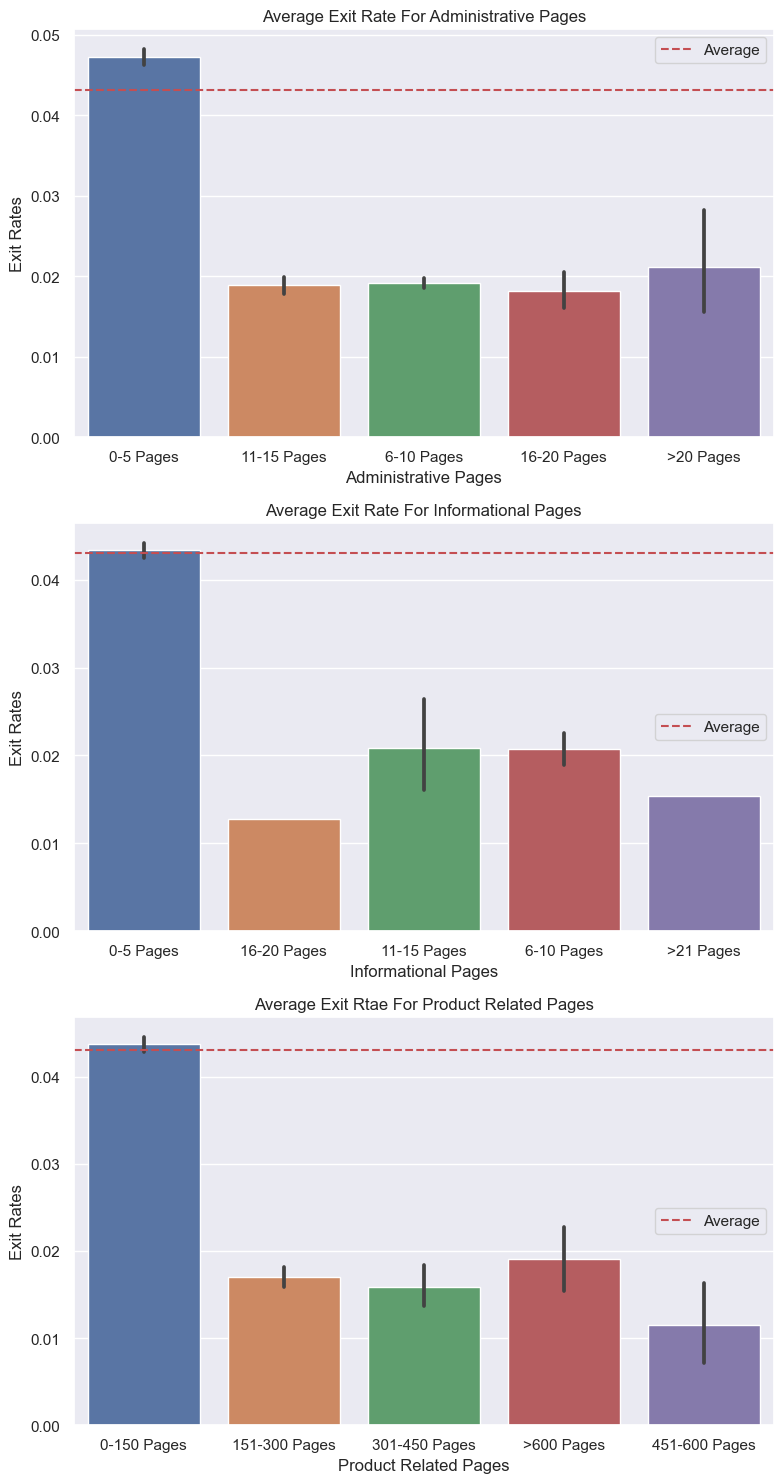

In [28]:
# Analyzing the average exit rates for the diferent sections

# Calculate the average exit rate for each section
admin_avg = data['ExitRates'].mean()
info_avg = data['ExitRates'].mean()
pdt_avg = data['ExitRates'].mean()

# Analyzing the average exit rates for the different sections
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

# Subplot 1
sns.barplot(data=data, x='admin_bracket', y='ExitRates', ax=axes[0])
axes[0].axhline(admin_avg, color='r', linestyle='--', label='Average')
axes[0].set_title('Average Exit Rate For Administrative Pages')
axes[0].set_ylabel('Exit Rates')
axes[0].set_xlabel('Administrative Pages')
axes[0].legend()

# Subplot 2
sns.barplot(data=data, x='info_bracket', y='ExitRates', ax=axes[1])
axes[1].axhline(info_avg, color='r', linestyle='--', label='Average')
axes[1].set_title('Average Exit Rate For Informational Pages')
axes[1].set_ylabel('Exit Rates')
axes[1].set_xlabel('Informational Pages')
axes[1].legend()

# Subplot 3
sns.barplot(data=data, x='pdt_bracket', y='ExitRates', ax=axes[2])
axes[2].axhline(pdt_avg, color='r', linestyle='--', label='Average')
axes[2].set_title('Average Exit Rtae For Product Related Pages')
axes[2].set_ylabel('Exit Rates')
axes[2].set_xlabel('Product Related Pages')
axes[2].legend()

plt.tight_layout()
plt.show()


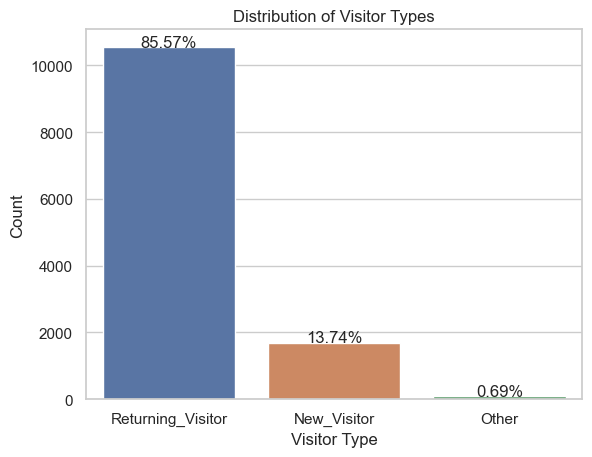

In [29]:
sns.set(style="whitegrid")  # Set the style of the plot

ax = sns.countplot(x='VisitorType', data=data)

total_height = len(data['VisitorType'])  # Total count for normalization

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total_height:.2%}', ha='center')

plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.title('Distribution of Visitor Types')

plt.show()

### Observations
- The visitors visiting the website are majorly returning visitors, likely revealing that the visitors gets what they wanted.

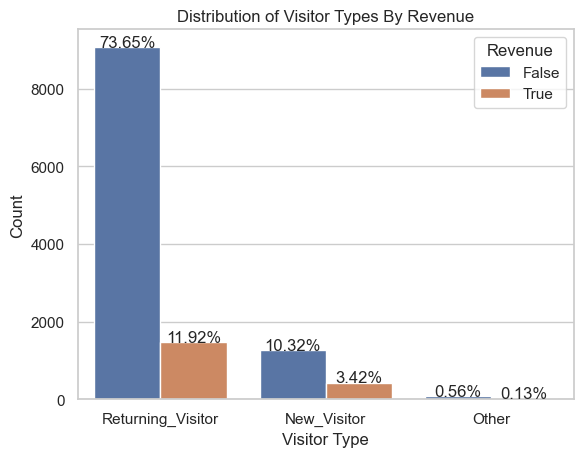

In [30]:
sns.set(style="whitegrid")  # Set the style of the plot

ax = sns.countplot(x='VisitorType', hue='Revenue', data=data)

total_height = len(data['VisitorType'])  # Total count for normalization

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total_height:.2%}', ha='center')

plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.title('Distribution of Visitor Types By Revenue')

plt.show()

### Observations
- Returning vissitors generate the highest percentage of revenue (11.92%)

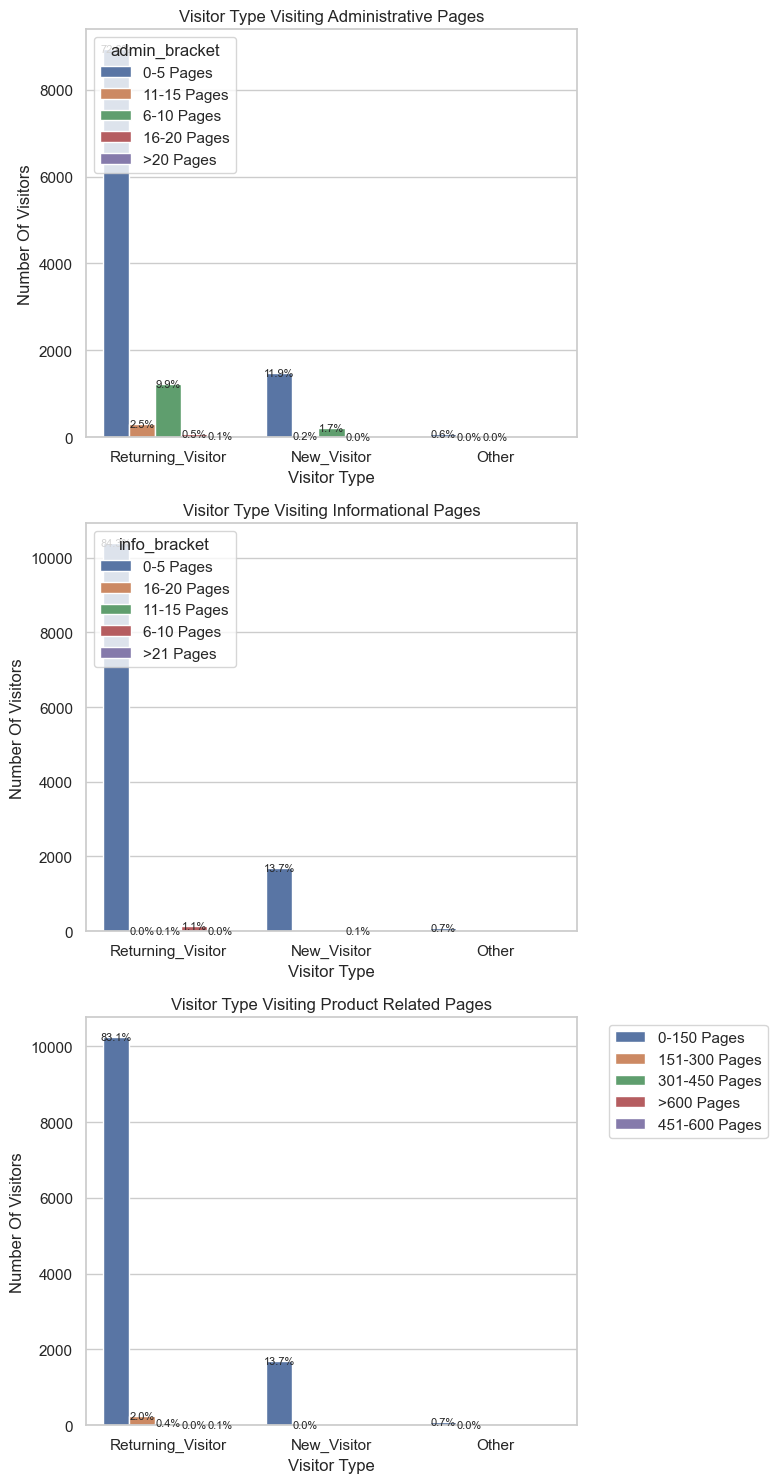

In [31]:
# Analyzing the type of visitors that visited more pages in the different sections
fig, axes = plt.subplots(3, 1, figsize = (8,15))
sns.countplot(data=data, hue='admin_bracket',x='VisitorType', ax=axes[0])
axes[0].set_title('Visitor Type Visiting Administrative Pages')
axes[0].set_ylabel('Number Of Visitors')
axes[0].set_xlabel('Visitor Type')

sns.countplot(data=data, hue='info_bracket',x='VisitorType', ax=axes[1])
axes[1].set_title('Visitor Type Visiting Informational Pages')
axes[1].set_ylabel('Number Of Visitors')
axes[1].set_xlabel('Visitor Type')

sns.countplot(data=data, hue='pdt_bracket',x='VisitorType', ax=axes[2])
axes[2].set_title('Visitor Type Visiting Product Related Pages')
axes[2].set_ylabel('Number Of Visitors')
axes[2].set_xlabel('Visitor Type')

# Calculate and display percentage proportions for each subplot
total_count = len(data)
for ax in axes:
    for p in ax.patches:
        percentage = p.get_height() * 100 / total_count
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=8)

# Move the legend outside the subplots
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Observation
- 72.6% of the visitors are Returning visitors to administrative pages visiting group 0-5 pages, while 11.9% are new visitors that visited same group of pages. The group 6-10 pages also have quite some percentages of visitors, having 9.9%, 1.7% and 0.0% from returning, new and other visitors.

- In the informational pages, 84.3% are returning visitors and they visited the group 0-5 pages, while 13.7% are new visitors, 0.7% are other types of visitors visiting the same group of page. The other group of pages were minutely visited by all kinds of visitors.

- The product related pages attracted 83.1% of its visitors who are returnign visitors to the page group of 0-150 pages, 13.7% and 0.7% by new visitors and other visitors respectively. 2.0% of the visitors (returning) visited 151-300 pages.

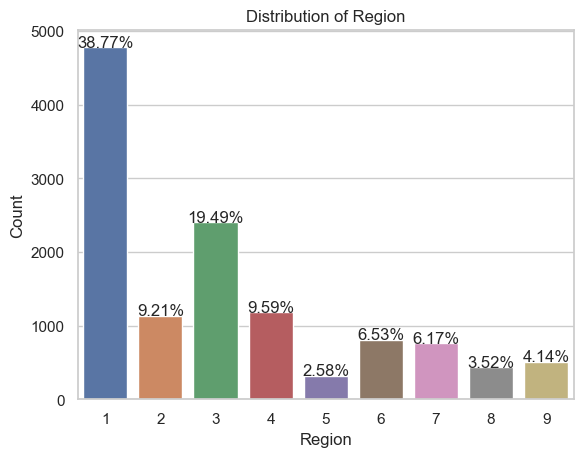

In [32]:
ax=sns.countplot(x='Region',data=data)
total_height = len(data['Region'])  # Total count for normalization

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, f'{height/total_height:.2%}', ha='center')

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Region')

plt.show()

### Observation
- 38.77% of the visitors are from region 1, the highest representation gotten by a region, while 2.58% from region 5, the least region represented.

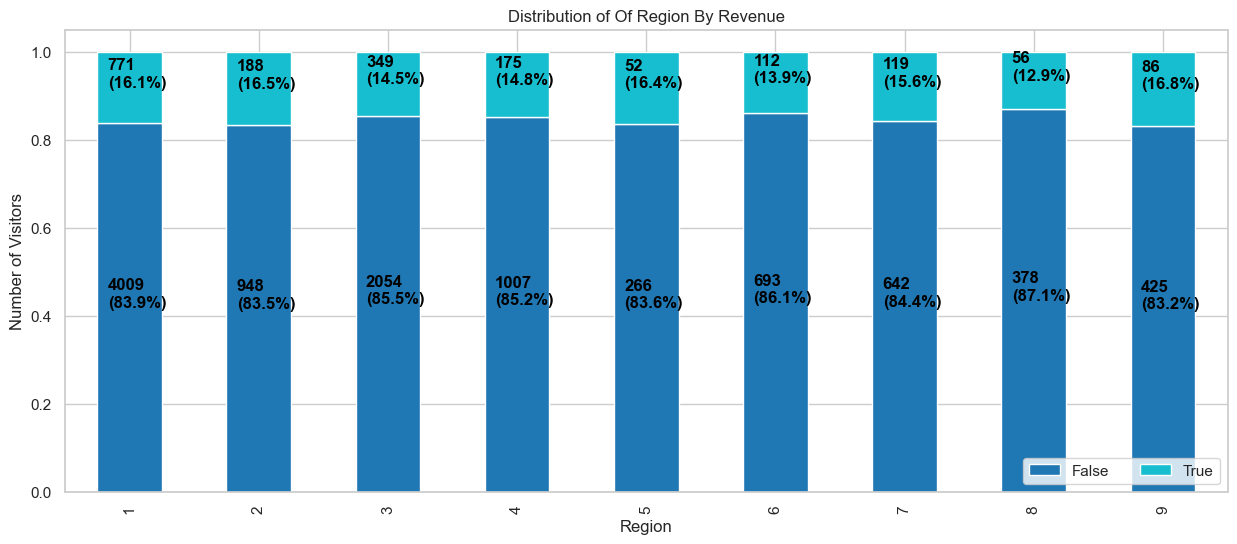

In [33]:
# The proportion of region that generated revenue 

# getting the percentage representaton of the region and revenue column
cross_tab_reg = pd.crosstab(index=data['Region'],
                             columns=data['Revenue'],
                             normalize="index")
cross_tab_reg

# getting the count representaton of the region and revenue
cross_reg = pd.crosstab(index=data['Region'],
                        columns=data['Revenue'])
cross_reg

# plotting the chart
cross_tab_reg.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(15, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel('Region')
plt.ylabel('Number of Visitors')
plt.title('Distribution of Of Region By Revenue')


for n, x in enumerate([*cross_reg.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_reg.loc[x],
                                          cross_reg.loc[x],
                                          cross_tab_reg.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Observation
- 16.8% of visitors from region 9 generated revenue, the highest from all regions, followed by region 2 and region 1 (16.5% and 16.1% respectively).
- Visitors from region 8had only 12.9% of the visitors that generated revenue.

Text(0.5, 0, 'Visitor Types')

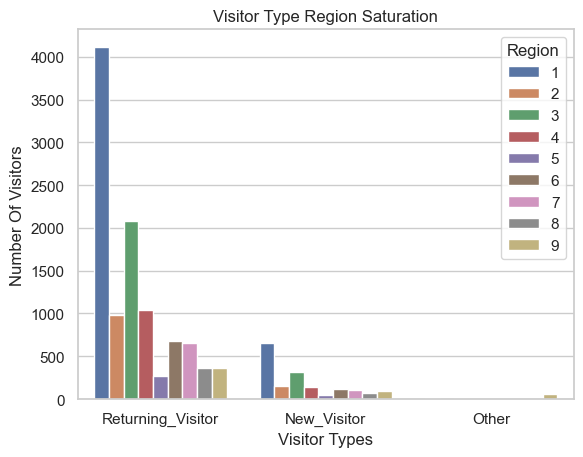

In [34]:
# Analyzing the region each type of visitor come from

sns.countplot(data=data, hue='Region', x='VisitorType')
plt.title('Visitor Type Region Saturation')
plt.ylabel('Number Of Visitors')
plt.xlabel('Visitor Types')

Text(0.5, 0, 'Administrative Page Groups')

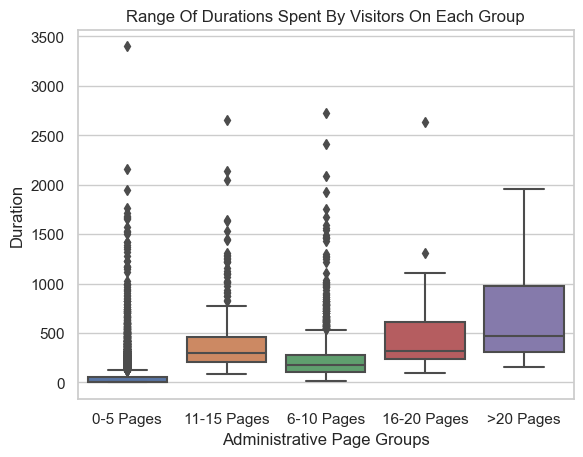

In [35]:
ax=sns.boxplot(x='admin_bracket', y='Administrative_Duration', data=data)
plt.title('Range Of Durations Spent By Visitors On Each Group')
plt.ylabel('Duration')
plt.xlabel('Administrative Page Groups')

### Observation
- More time was spent surfing through pages greater than 20.

Text(0.5, 0, 'Administrative Page Groups')

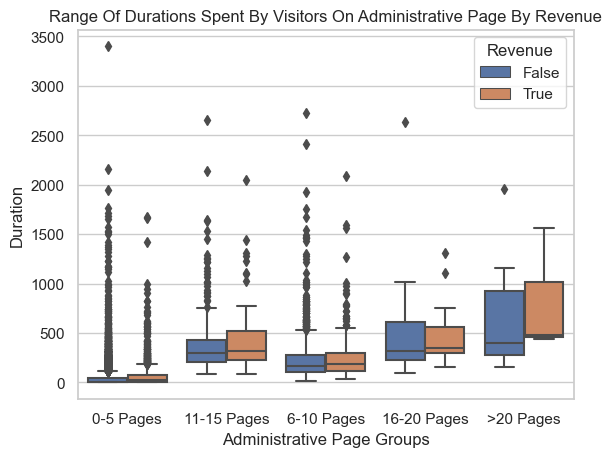

In [36]:
ax=sns.boxplot(x='admin_bracket', y='Administrative_Duration',hue='Revenue', data=data)
plt.title('Range Of Durations Spent By Visitors On Administrative Page By Revenue')
plt.ylabel('Duration')
plt.xlabel('Administrative Page Groups')

### Observation
- The average duration to generate revenue in the pages is slightly higher than those that did not generate revenue.

Text(0.5, 0, 'Informative Page Groups')

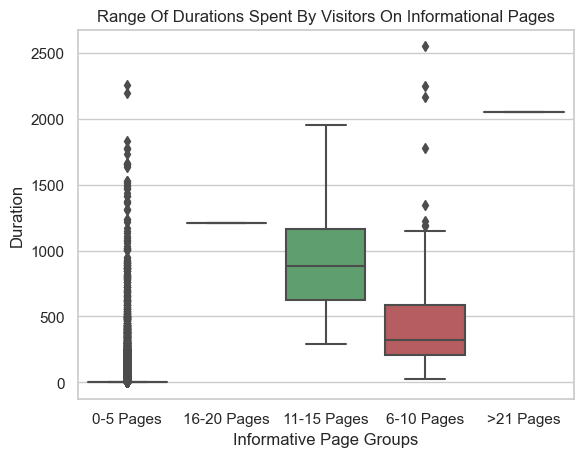

In [37]:
ax=sns.boxplot(x='info_bracket', y='Informational_Duration', data=data)
plt.title('Range Of Durations Spent By Visitors On Informational Pages')
plt.ylabel('Duration')
plt.xlabel('Informative Page Groups')

### Observations
- Visitors that visited group pages '16-20' and >21 have there durations highly concentrated at there averages, as well as group 0-5, though in some cases, it dispersed from the average.

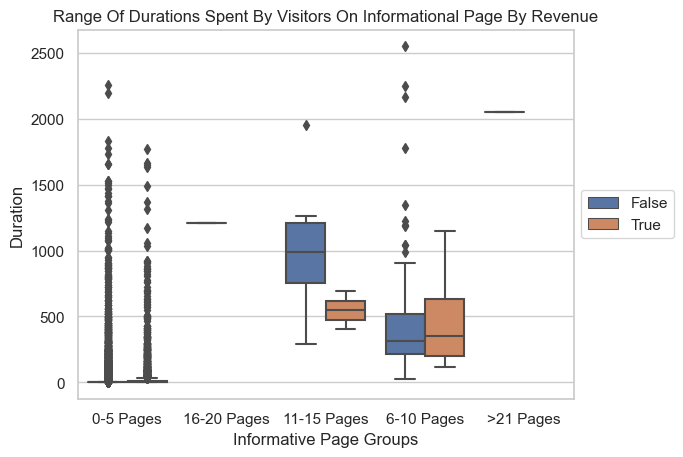

In [38]:
ax=sns.boxplot(x='info_bracket', y='Informational_Duration',hue='Revenue', data=data)
plt.title('Range Of Durations Spent By Visitors On Informational Page By Revenue')
plt.ylabel('Duration')
plt.xlabel('Informative Page Groups')


# Move the legend outside the chart
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Observation
- Revenue was highly likely to be made in the group '11-15' at range of about 450-650 duration.
- In group 6-10, the average duration of making revenue is slightly higher, though, the range of duration for making revenue or not in that group falls almost in the same range.

Text(0.5, 0, 'Product Related Page Groups')

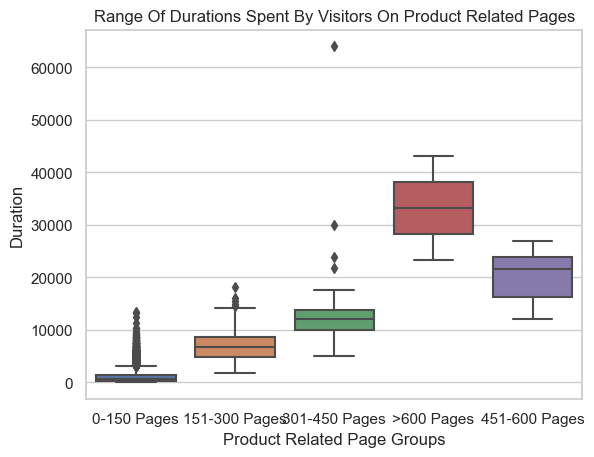

In [39]:
ax=sns.boxplot(x='pdt_bracket', y='ProductRelated_Duration', data=data)
plt.title('Range Of Durations Spent By Visitors On Product Related Pages')
plt.ylabel('Duration')
plt.xlabel('Product Related Page Groups')

### Observation
- Group of >600 pages spend a higher duration, the lower the number of pages, the lower the time spent.

Text(0.5, 0, 'Product Related Page Groups')

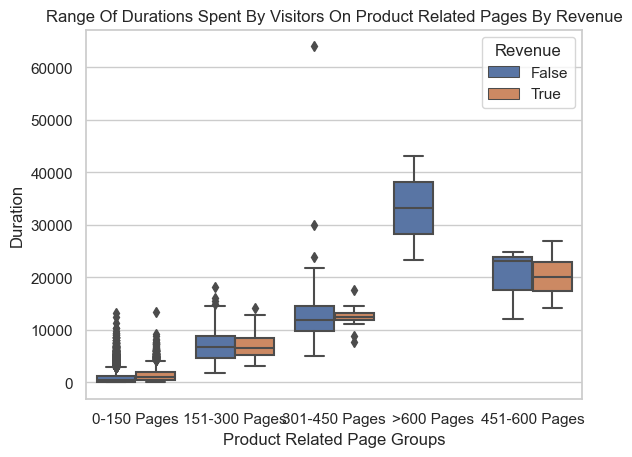

In [40]:
ax=sns.boxplot(x='pdt_bracket', y='ProductRelated_Duration', hue='Revenue',data=data)
plt.title('Range Of Durations Spent By Visitors On Product Related Pages By Revenue')
plt.ylabel('Duration')
plt.xlabel('Product Related Page Groups')

### Observation
- '>600 pages' group does not generate any revenue, unlike the other groups.
- Group 451-600 pages has its average duration that made profit lower than than the average duration that did not make revenue.

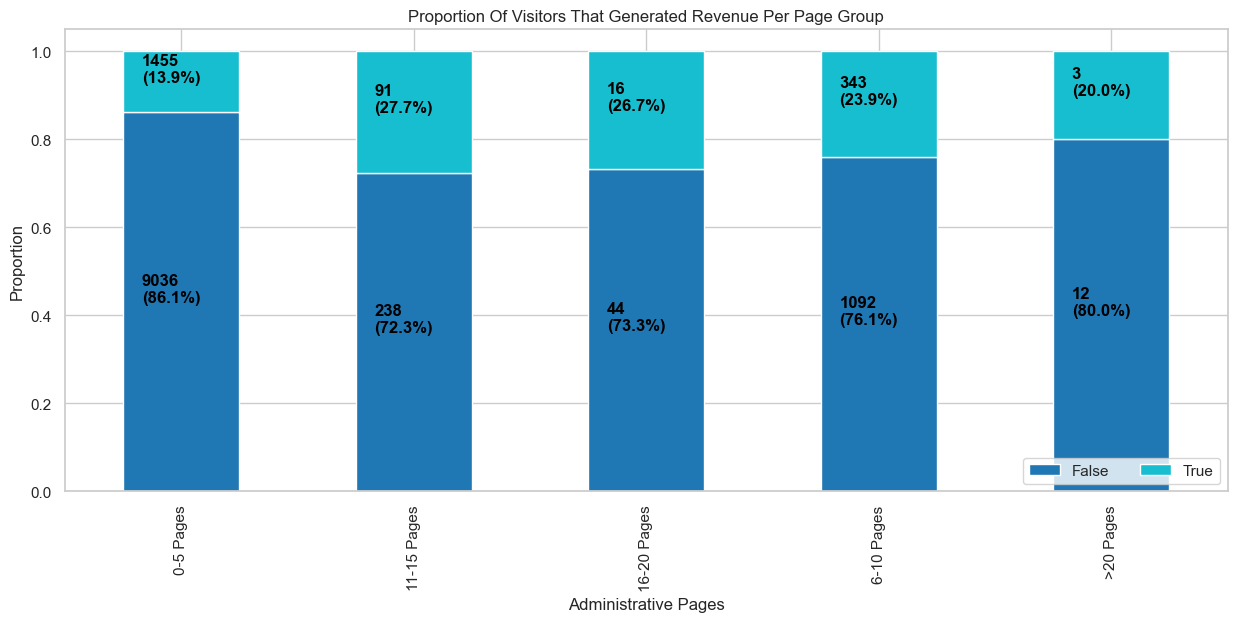

In [41]:
# getting the percentage representaton of the job and default column
cross_tab_admin = pd.crosstab(index=data['admin_bracket'],
                             columns=data['Revenue'],
                             normalize="index")
cross_tab_admin

# getting the count representaton of the job and default column
cross_admin = pd.crosstab(index=data['admin_bracket'],
                        columns=data['Revenue'])
cross_admin

# plotting the chart
cross_tab_admin.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(15, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Administrative Pages")
plt.ylabel("Proportion")
plt.title('Proportion Of Visitors That Generated Revenue Per Page Group')


for n, x in enumerate([*cross_admin.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_admin.loc[x],
                                          cross_admin.loc[x],
                                          cross_tab_admin.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

###  Observations
- The average time spent by visitors that visited 21-25 pages was higher(about 500s), while the average time spent by visitors that visited 0-5 pages was the least.

- There were no outliers in the duration spent by visitors visiting 21-25 pages, unlike other paged groups.

<AxesSubplot:xlabel='Administrative_Duration', ylabel='Administrative'>

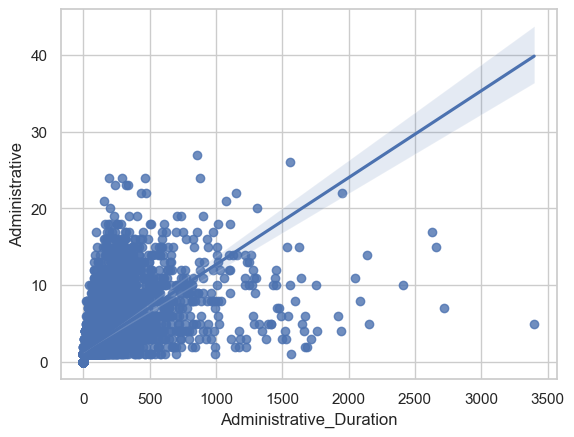

In [42]:
sns.regplot(x='Administrative_Duration', y='Administrative', data=data)

### Informational

<AxesSubplot:xlabel='Informational_Duration', ylabel='Informational'>

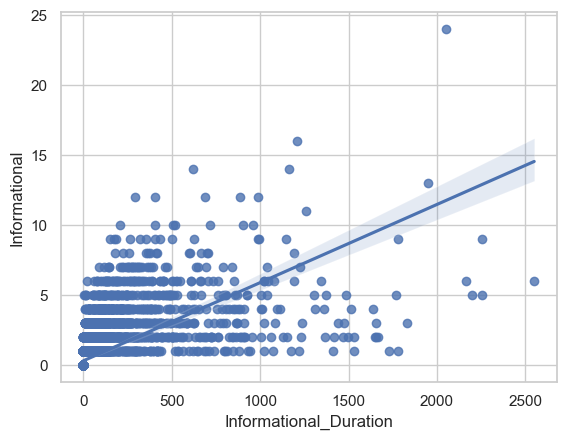

In [43]:
sns.regplot(x='Informational_Duration',y='Informational', data=data,)

### Production Related

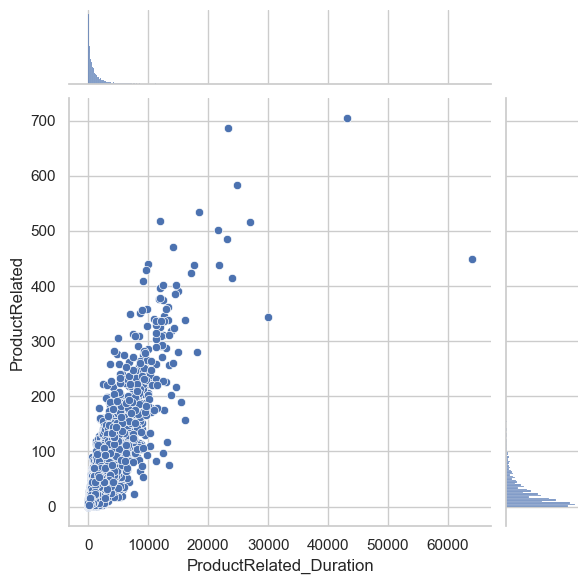

In [44]:
sns.jointplot(x='ProductRelated_Duration',y='ProductRelated', data=data,)


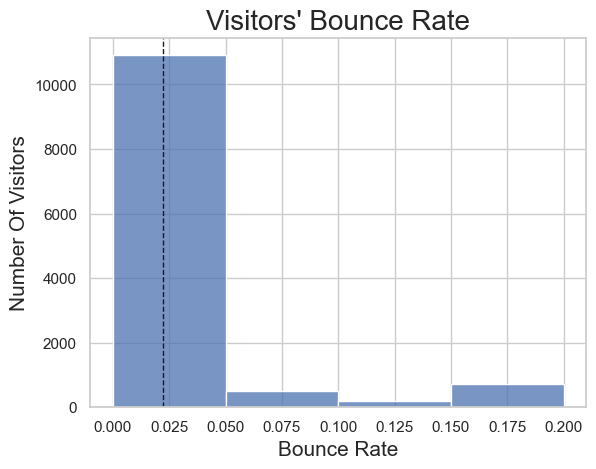

In [45]:
#create histplot
sns.histplot(data['BounceRates'], bins=4)
plt.xlabel('Bounce Rate', size=15)
plt.ylabel('Number Of Visitors', size=15)
plt.title("Visitors' Bounce Rate", size=20)

# indicate the average line
plt.axvline(data['BounceRates'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

#### Bounce Rate is defined as the percentage of visitors that leave a webpage without taking an action, such as clicking on a link, filling out a form, or making a purchase.

- The highest bounce rate from all the visitors ranges from 0% - 5% (more than 10,000 visitors fall within this category).
- The average rate is 2.2%

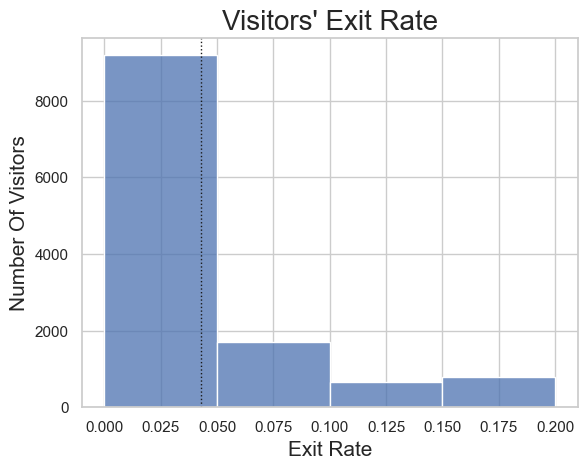

In [46]:
#create histplot
sns.histplot(data['ExitRates'], bins=4)
plt.xlabel('Exit Rate', size=15)
plt.ylabel('Number Of Visitors', size=15)
plt.title("Visitors' Exit Rate", size=20)

# indicate the average line
plt.axvline(data['ExitRates'].mean(), color='k', linestyle=':', linewidth=1)
plt.show()

### Naration
- The average exit rate of visitors on the website is 4.3%
- The website has more visitors at the exit rate ranging from 0% - 5%

<AxesSubplot:xlabel='BounceRates', ylabel='ExitRates'>

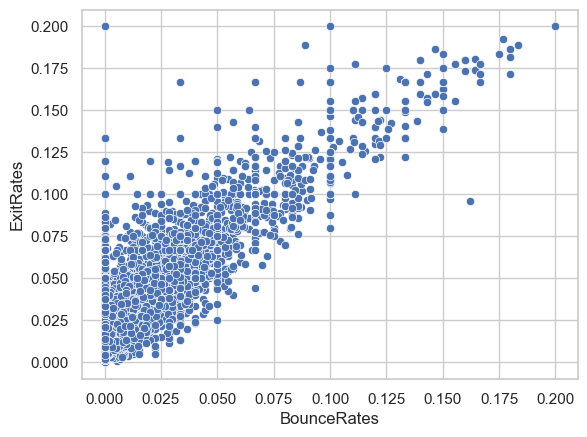

In [47]:
# relationship between exit rate and bounce rate
sns.scatterplot(y=data['ExitRates'], x=data['BounceRates'])

### Observation
- The chart shows that the lower the bounce rate, the lower the exit rate, only on some few cases.
- This indicates that the more visitors dwell on a page, the more the likelihood of exploring the website.

Text(0.5, 1.0, 'Relationship Between Administrative Duration And Bounce Rates')

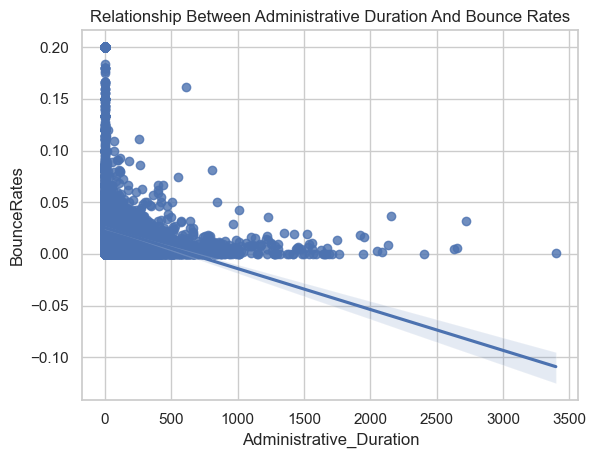

In [48]:
# showing the relationship of the time spent on administrative page with the bounce rate
sns.regplot(x=data['Administrative_Duration'], y=data['BounceRates'])
plt.title('Relationship Between Administrative Duration And Bounce Rates')

### Observation
- Chart show a  sligth negative interaction between the features, the higher the adm

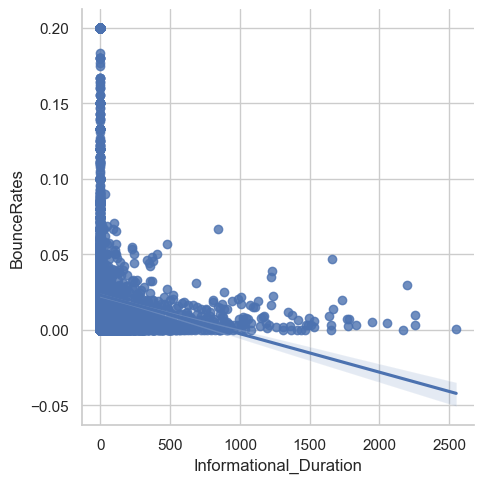

In [49]:
# showing the relationship of the time spent on administrative page with the exit rate
sns.lmplot(x='Informational_Duration', y='BounceRates', data=data)

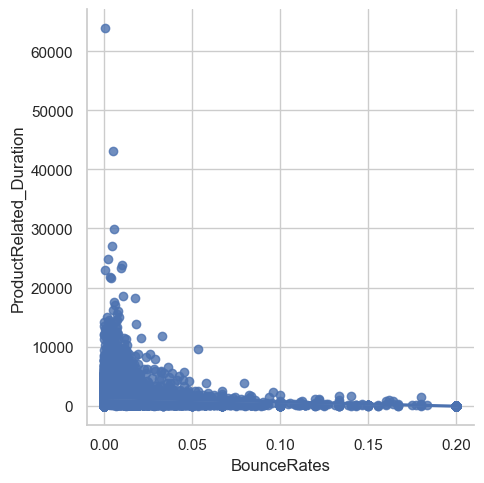

In [50]:
sns.lmplot(y='ProductRelated_Duration', x='BounceRates', data=data)

<AxesSubplot:xlabel='ExitRates', ylabel='Informational_Duration'>

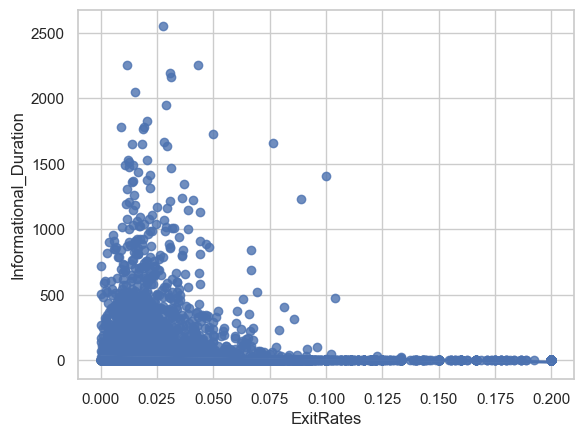

In [51]:
sns.regplot(y=data['Informational_Duration'], x=data['ExitRates'])

<AxesSubplot:>

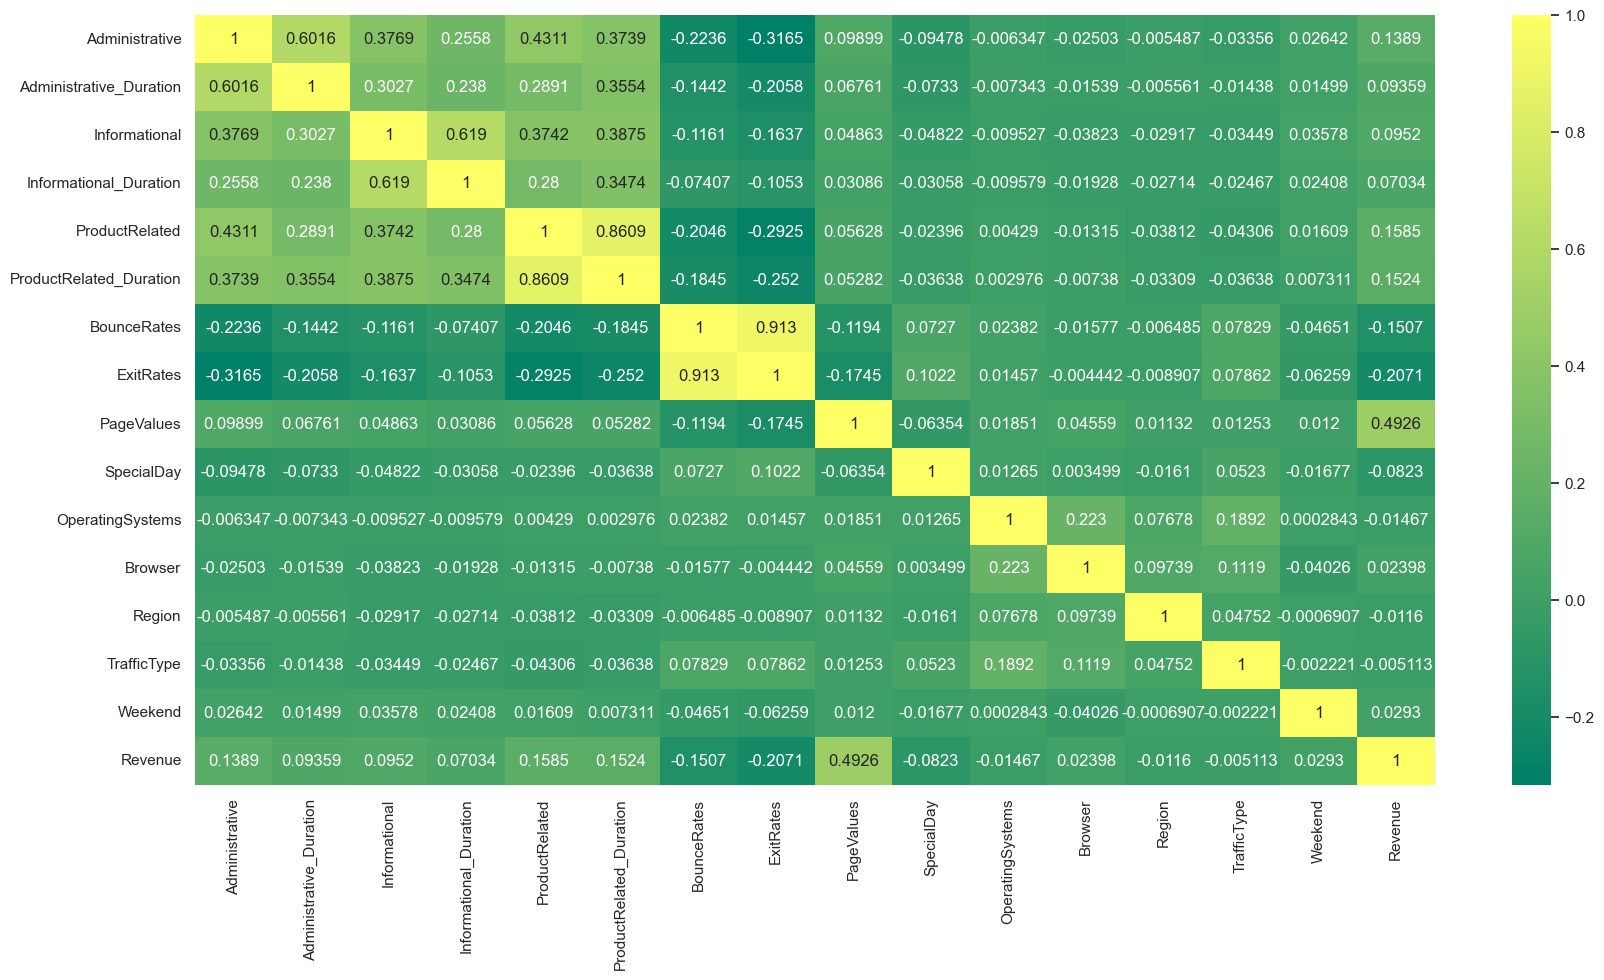

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap='summer', fmt='.4g', annot=True)

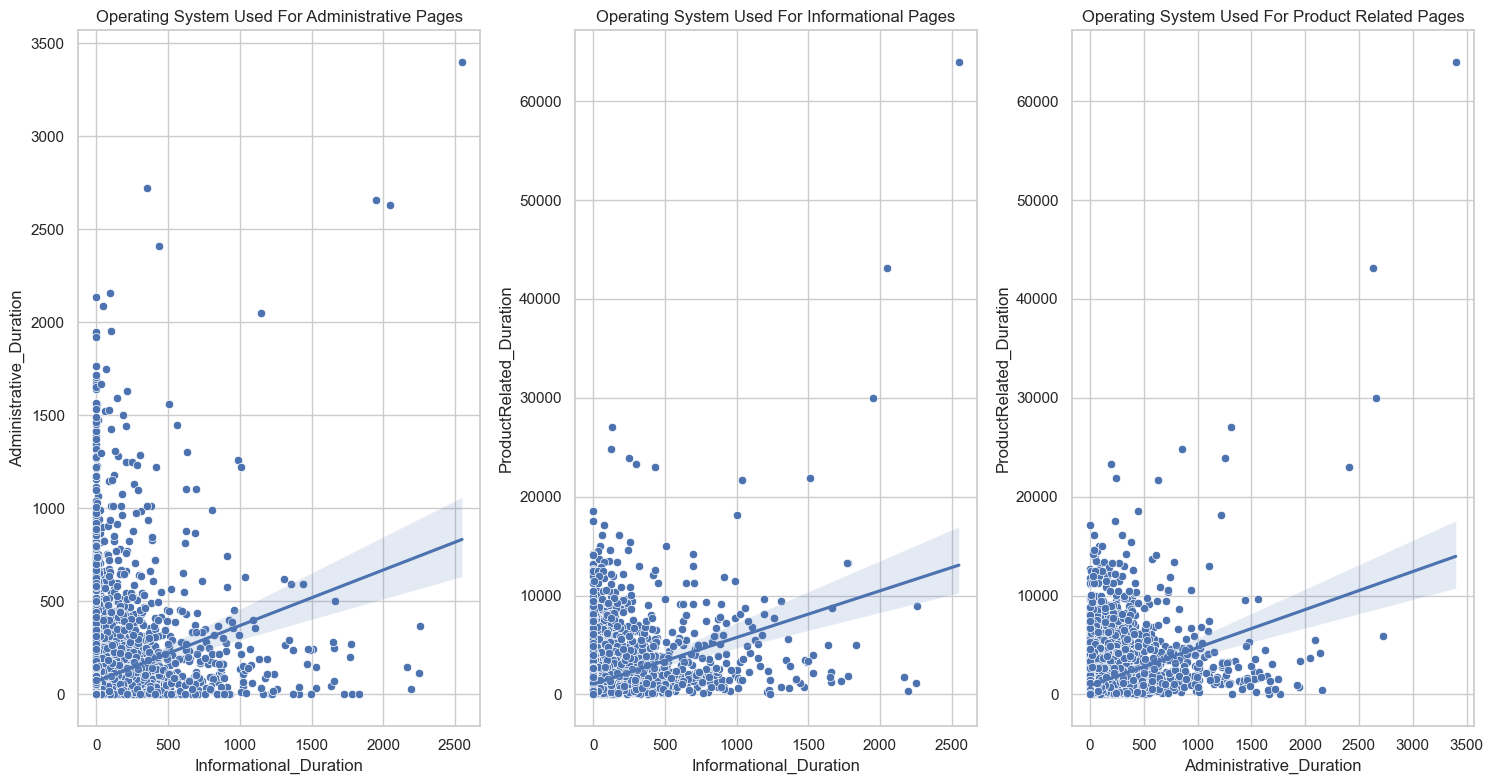

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

sns.scatterplot(y='Administrative_Duration', x='Informational_Duration', data=data, ax=axes[0])
sns.regplot(y='Administrative_Duration', x='Informational_Duration', data=data, scatter=False, ax=axes[0])
axes[0].set_title('Operating System Used For Administrative Pages')
#axes[0].set_ylabel('Exit Rates')
#axes[0].set_xlabel('Administrative Pages')

sns.scatterplot(y='ProductRelated_Duration', x='Informational_Duration', data=data, ax=axes[1])
sns.regplot(y='ProductRelated_Duration', x='Informational_Duration', data=data, scatter=False, ax=axes[1])
axes[1].set_title('Operating System Used For Informational Pages')
#axes[1].set_ylabel('Exit Rates')
#axes[1].set_xlabel('Informational Pages')

sns.scatterplot(y='ProductRelated_Duration', x='Administrative_Duration', data=data, ax=axes[2])
sns.regplot(y='ProductRelated_Duration', x='Administrative_Duration', data=data, scatter=False, ax=axes[2])
axes[2].set_title('Operating System Used For Product Related Pages')
#axes[2].set_ylabel('Exit Rates')
#axes[2].set_xlabel('Product Related Pages')

plt.tight_layout()
plt.show()


### Observations
- Accross the sections, the chart shows a positive interaction between the pages and its duration. This indicates that the more the pages visited, the more durations spent on the website.

Text(0.5, 1.0, 'The Interaction Of Product Related Duration And Bounce Rates By Revenue')

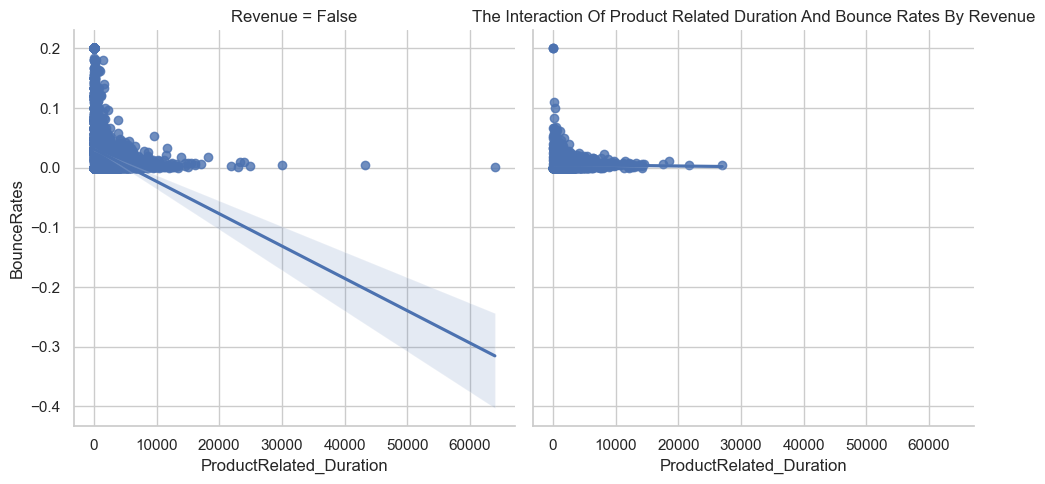

In [54]:
sns.lmplot(data=data, x='ProductRelated_Duration', y='BounceRates',col='Revenue')
plt.title("The Interaction Of Product Related Duration And Bounce Rates By Revenue")

### Observations
- Visitors that did not generate revenue slightly have a negative interaction with the bounce rate,
- Visitors that generated revenue are concentrated largely around the 0% bounce rate, they show no interaction between the features.

Text(0.5, 1.0, 'The Interaction Of Informational Duration And Bounce Rates By Revenue')

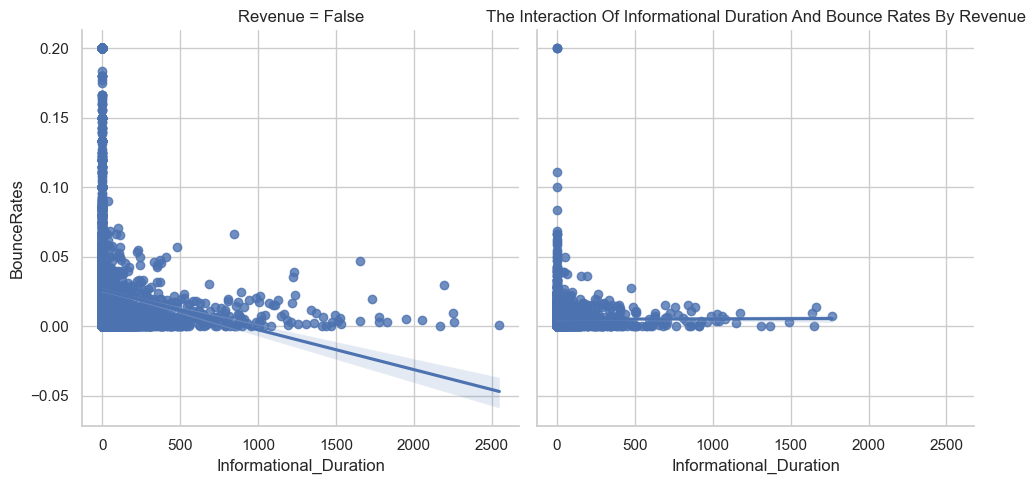

In [55]:
sns.lmplot(data=data, x='Informational_Duration', y='BounceRates',col="Revenue")
plt.title("The Interaction Of Informational Duration And Bounce Rates By Revenue")

### Observations
- The interaction, generating revenue reveals a very slight positive interaction while the interation that did not yield revenue shows a slight negative interaction.

Text(0.5, 1.0, 'The Interaction Of Administrative Duration And Bounce Rates By Revenue')

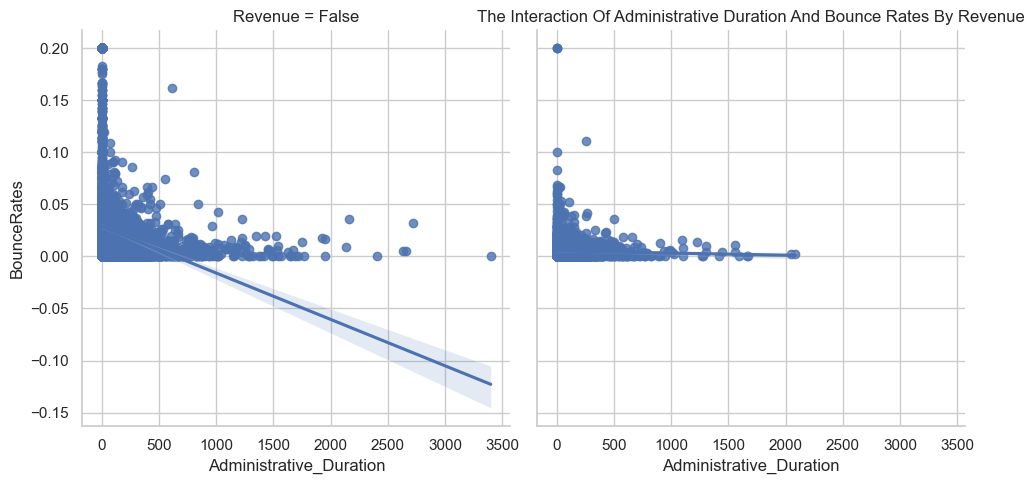

In [56]:
sns.lmplot(data=data, x='Administrative_Duration', y='BounceRates',col="Revenue")
plt.title("The Interaction Of Administrative Duration And Bounce Rates By Revenue")

### Observations
- Visitors that did not generate revenue slightly have a negative interaction with the bounce rate,
- Visitors that generated revenue are concentrated largely around the 0% bounce rate, they show no interaction between the features.

<AxesSubplot:xlabel='TrafficType', ylabel='count'>

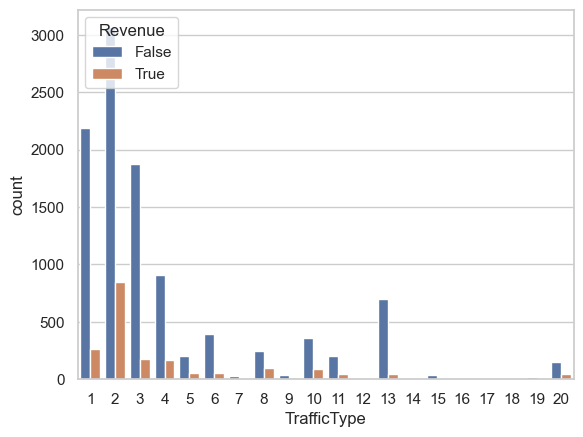

In [57]:
sns.countplot(x='TrafficType', hue='Revenue', data=data)

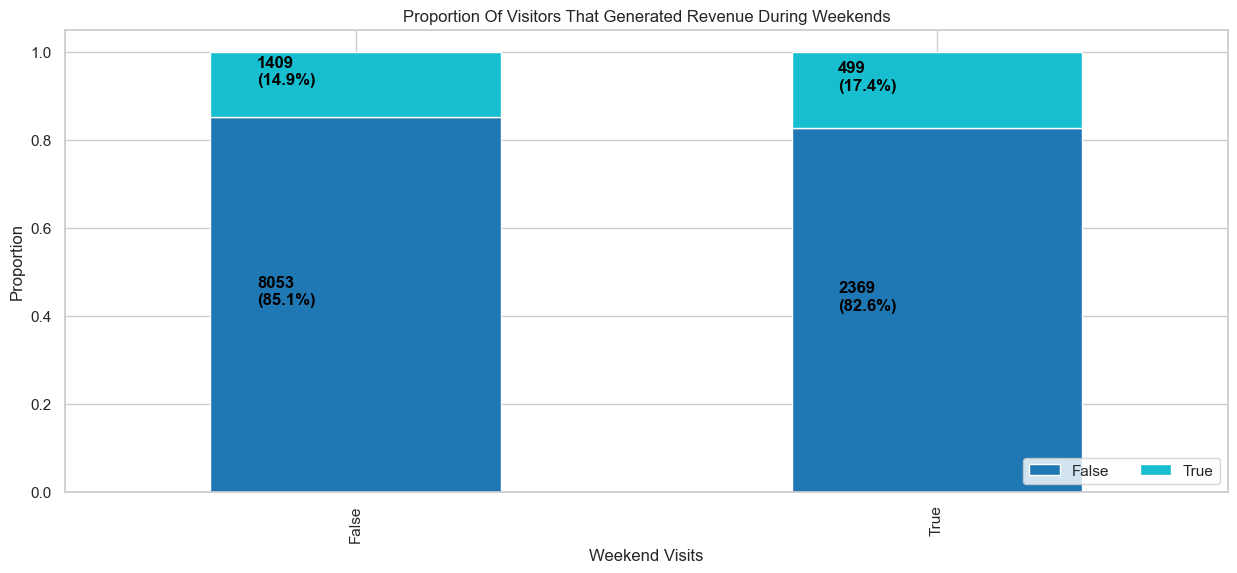

In [58]:
# getting the percentage representaton of weekend visits and revenue column
cross_tab_wknd = pd.crosstab(index=data['Weekend'],
                             columns=data['Revenue'],
                             normalize="index")
cross_tab_wknd

# getting the count representaton of the weekend visits and revenue column
cross_wknd = pd.crosstab(index=data['Weekend'],
                        columns=data['Revenue'])
cross_wknd

# plotting the chart
cross_tab_wknd.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(15, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Weekend Visits")
plt.ylabel("Proportion")
plt.title('Proportion Of Visitors That Generated Revenue During Weekends')


for n, x in enumerate([*cross_wknd.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_wknd.loc[x],
                                          cross_wknd.loc[x],
                                          cross_tab_wknd.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Observation

- More percentage (17.4%) of visitors that visited on weekends generated revenue as to 14.9% of visitors during weekdays that generated revenue.

Text(0.5, 1.0, 'Administrative Duration Per Month By Revenue')

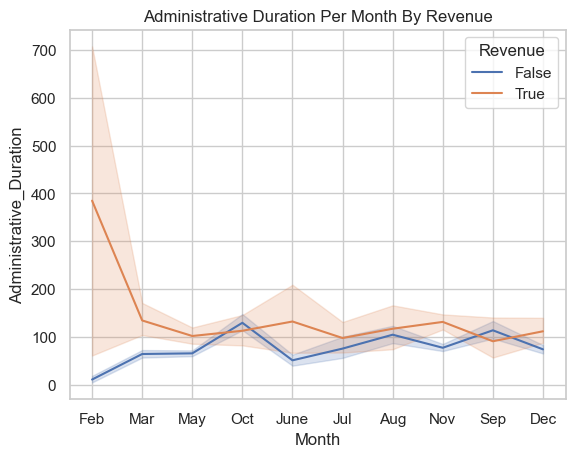

In [59]:
#Analyzing the months that visitors visited most
sns.lineplot(x='Month', y='Administrative_Duration', hue='Revenue',data=data)
plt.title('Administrative Duration Per Month By Revenue')

### Observation
- The average duration spent that generated revenue dropped from 400 in February to about 150 in March and have been maintaining the trend.
- In the month of October and september, the average duration spent to make revenue fell below the average duration spent to not make revenue.

Text(0.5, 1.0, 'Informational Duration Per Month By Revenue')

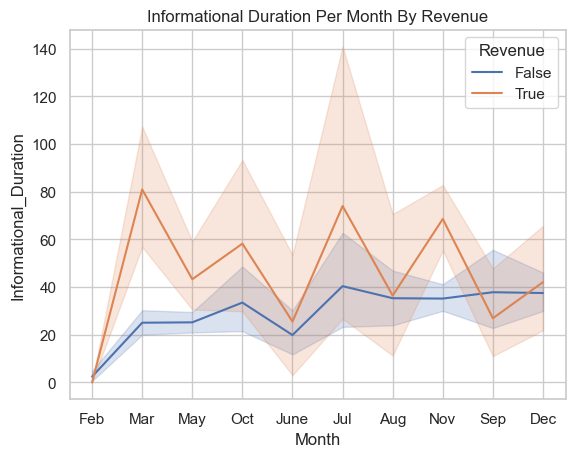

In [60]:
#Analyzing the months that visitors visited most
sns.lineplot(x='Month', y='Informational_Duration', hue='Revenue',data=data)
plt.title('Informational Duration Per Month By Revenue')

### Observation
- There was a high increase in the duration required to make revenue, and the average duration require has always been higher except in the month of september where it fell below the average required not to make profit.

Text(0.5, 1.0, 'Product Related Duration Per Month By Revenue')

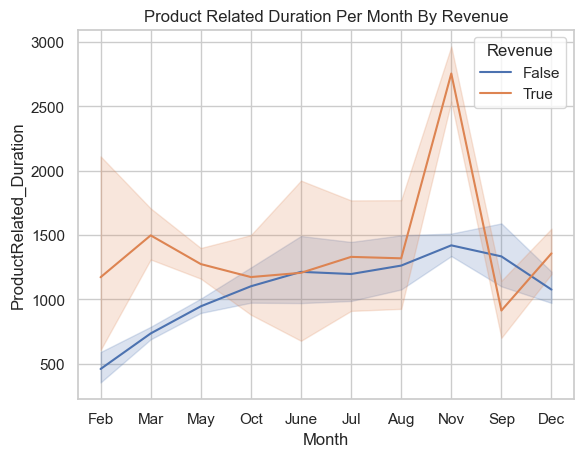

In [61]:
#Analyzing the months that visitors visited most
sns.lineplot(x='Month', y='ProductRelated_Duration', hue='Revenue',data=data)
plt.title('Product Related Duration Per Month By Revenue')

### Observation
- In the month of November there was a rise in the average duration required to make revenue. It rose from about 1700 in the month of August to about 2700 in November
- There was an equal average required to either generate revenue or not in the month of october and the average to generate revenue dropped beyond the average required to not generate revenue.

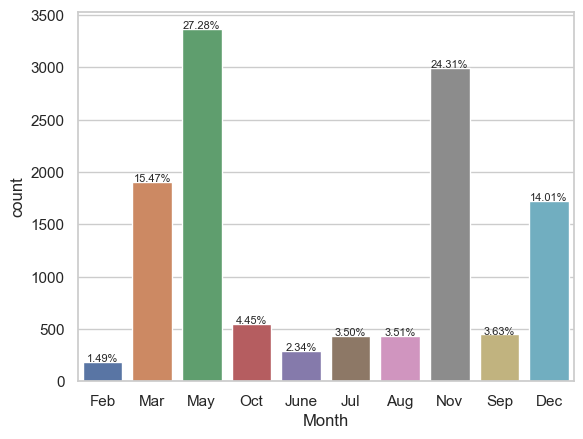

In [62]:
ax = sns.countplot(data=data, x='Month')

# Calculate the total count for each category
total = len(data['Month'])

# Iterate over each bar in the countplot
for p in ax.patches:
    # Get the height of the bar
    height = p.get_height()
    
    # Calculate the percentage and format it as a string
    percentage = f'{(height/total) * 100:.2f}%'
    
    # Add the percentage label at the top of each bar
    ax.text(p.get_x() + p.get_width() / 2, height + 3, percentage, ha='center', fontsize=8)

plt.show()

### Observation
- There were more visitors in the month of may with 27.28% and 24.31% in November
- February had the least visitors visiting with 1.49%.

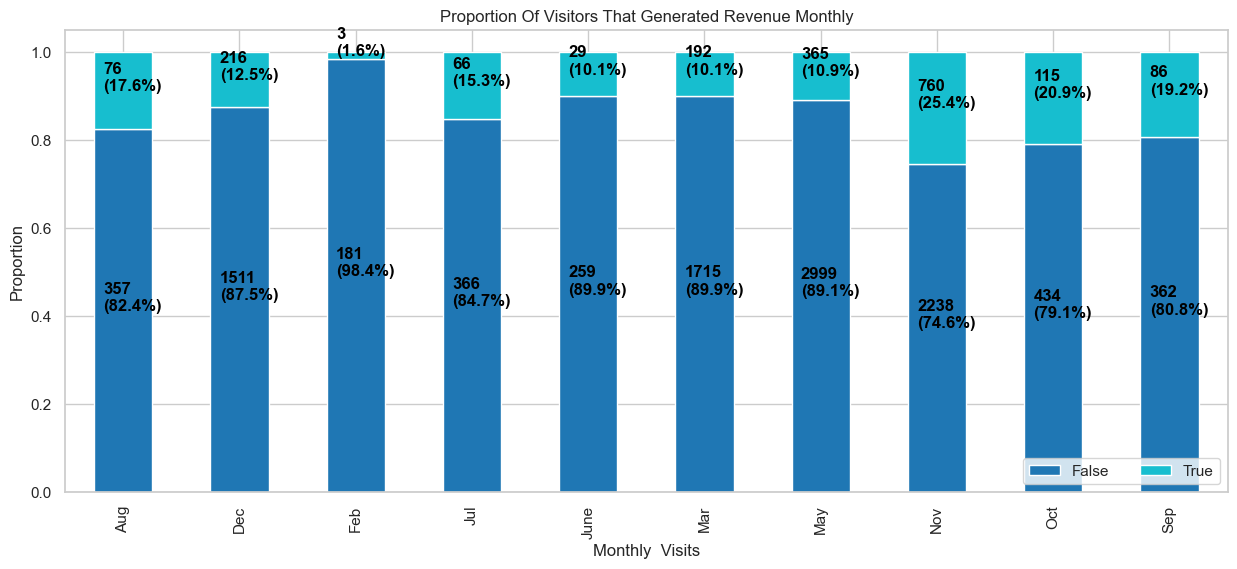

In [63]:
# getting the percentage representaton of monthly visits and revenue column
cross_tab_mth = pd.crosstab(index=data['Month'],
                             columns=data['Revenue'],
                             normalize="index")
cross_tab_mth

# getting the count representaton of the monthly visits and revenue column
cross_mth = pd.crosstab(index=data['Month'],
                        columns=data['Revenue'])
cross_mth

# plotting the chart
cross_tab_mth.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(15, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Monthly  Visits")
plt.ylabel("Proportion")
plt.title('Proportion Of Visitors That Generated Revenue Monthly')


for n, x in enumerate([*cross_mth.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_mth.loc[x],
                                          cross_mth.loc[x],
                                          cross_tab_mth.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

### Observation
- 25.4% of the total visitors in the month of November generated revenue, the highest percentage proportion of visitors that generated revenue.
- In the month of February, only 1.6% of the visitors generated revenue.

In [64]:
# dropping columns

data.drop(['admin_bracket', 'pdt_bracket', 'info_bracket'], axis=1, inplace=True)

## Normalization

In [65]:
# minmaxscaler ensures all the variables falls between 0 and 1
# it is used to check and normalize outliers

scaler = MinMaxScaler()

data['ProductRelated_Duration'] = scaler.fit_transform(data['ProductRelated_Duration'].values.reshape(-1,1))
data['ProductRelated'] = scaler.fit_transform(data['ProductRelated'].values.reshape(-1,1))

In [66]:
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0        0.001418                 0.000000   
1                     0.0        0.002837                 0.001000   
2                     0.0        0.001418                 0.000000   
3                     0.0        0.002837                 0.000042   
4                     0.0        0.014184                 0.009809   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [68]:
# encoding the categorical features
le = LabelEncoder()

data['Month'] = le.fit_transform(data['Month'])

data['VisitorType'] = le.fit_transform(data['VisitorType'])

data['Weekend'] = le.fit_transform(data['Weekend'])

data['Revenue'] = le.fit_transform(data['Revenue'])

data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0        0.001418                 0.000000   
1                     0.0        0.002837                 0.001000   
2                     0.0        0.001418                 0.000000   
3                     0.0        0.002837                 0.000042   
4                     0.0        0.014184                 0.009809   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        1       1            1            2        0        0  
1        2       1            2            2        0        0  
2        1       9            3            2        0        0  
3        2       2            4            2        0        0  
4        3       1            4            2        1        0

In [69]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [70]:
# drop exit rate column
data.drop(['ExitRates'], axis=1, inplace=True)

## Machine Learning

In [71]:
df = data[['Administrative_Duration',
       'Informational_Duration', 'ProductRelated_Duration',
       'BounceRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]

label = data['Revenue']

In [72]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=42)

In [73]:
# Model building

# Logistic Regression

logreg = LogisticRegression() #logreg is a variable name assigned to LogisticRegression(), it can be anything

logreg.fit(X_train, y_train)  # this is basically machine learning

ly_pred = logreg.predict(X_test) # machine testing
#
print('Score of train:', logreg.score(X_train, y_train))
#
print('Score of test:', logreg.score(X_test, y_test))
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

# Calculate R-squared score
r2 = r2_score(y_test, ly_pred)
print('R_squared score: ', r2)

Score of train: 0.8886861313868614
Score of test: 0.8694241686942417
Logistic Regression
Accuracy: 0.8694241686942417
Precision: 0.7431693989071039
Recall: 0.3309002433090024
F1-score: 0.45791245791245794
AUC-ROC: 0.654014598540146
R_squared score:  0.05985401459854012


<function matplotlib.pyplot.show(close=None, block=None)>

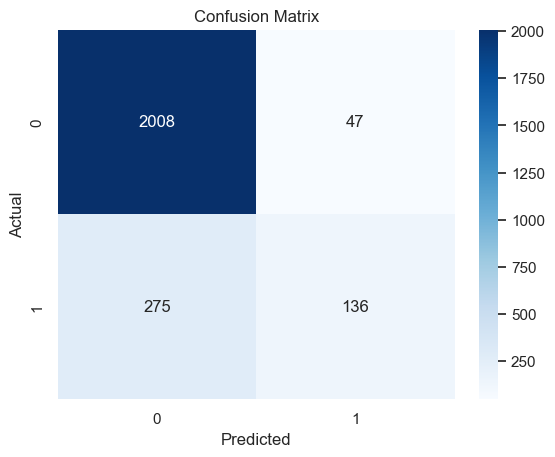

In [74]:
# Confusion Matrix For Logistic Regression

lcm = confusion_matrix(y_test, ly_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [75]:
# Initialize the classifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)
# Make predictions
y_pred = xgb_classifier.predict(X_test)

print('Score of train:', logreg.score(X_train, y_train))
#
print('Score of test:', logreg.score(X_test, y_test))
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_pred))

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print('R_squared score: ', r2)

Score of train: 0.8886861313868614
Score of test: 0.8694241686942417
Logistic Regression
Accuracy: 0.8876723438767234
Precision: 0.6982248520710059
Recall: 0.5742092457420924
F1-score: 0.630173564753004
AUC-ROC: 0.7622871046228711
R_squared score:  0.1912408759124088


<function matplotlib.pyplot.show(close=None, block=None)>

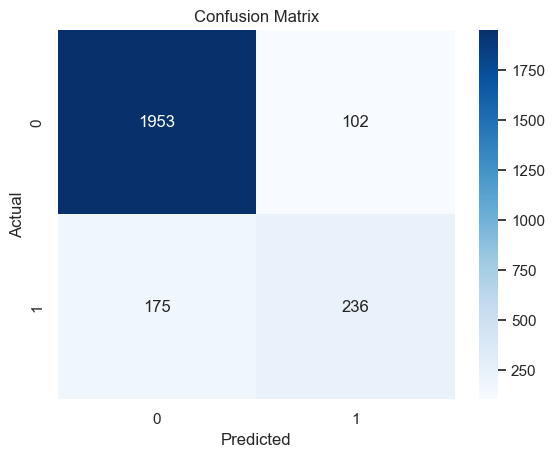

In [76]:
# Confusion Matrix For XGB Classifier

XGB = confusion_matrix(y_test, y_pred)

# visualize the confusion matrix
sns.heatmap(XGB, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [77]:
# Random forest classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print('Score of train:', rfc.score(X_train, y_train))
print('Score of test:', rfc.score(X_test, y_test))
print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rfc_pred))
print('Precision:', precision_score(y_test, rfc_pred))
print('Recall:', recall_score(y_test, rfc_pred))
print('F1-score:', f1_score(y_test, rfc_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfc_pred))
# Calculate R-squared score
r2 = r2_score(y_test, rfc_pred)
print('R_squared score: ', r2)

Score of train: 1.0
Score of test: 0.8913219789132197
Random Forest Classifier
Accuracy: 0.8913219789132197
Precision: 0.7313915857605178
Recall: 0.5498783454987834
F1-score: 0.6277777777777778
AUC-ROC: 0.7547445255474453
R_squared score:  0.2175182481751825


<function matplotlib.pyplot.show(close=None, block=None)>

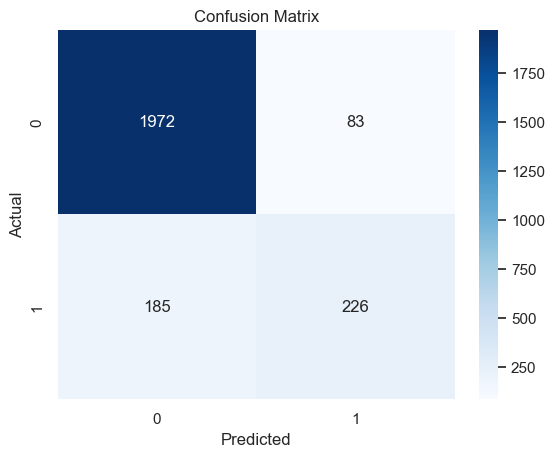

In [78]:
# Confusion Matrix For Logistic Regression

rfc = confusion_matrix(y_test, rfc_pred)

# visualize the confusion matrix
sns.heatmap(rfc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [79]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

print('Score of train:', dtc.score(X_train, y_train))
print('Score of test:', dtc.score(X_test, y_test))
print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, dtc_pred))
print('Precision:', precision_score(y_test, dtc_pred))
print('Recall:', recall_score(y_test, dtc_pred))
print('F1-score:', f1_score(y_test, dtc_pred))
print('AUC-ROC:', roc_auc_score(y_test, dtc_pred))
# Calculate R-squared score
r2 = r2_score(y_test, dtc_pred)
print('R_squared score: ', r2)

Score of train: 1.0
Score of test: 0.8665855636658556
Decision Tree Classifier
Accuracy: 0.8665855636658556
Precision: 0.6014851485148515
Recall: 0.5912408759124088
F1-score: 0.5963190184049081
AUC-ROC: 0.7564476885644769
R_squared score:  0.039416058394160625


<function matplotlib.pyplot.show(close=None, block=None)>

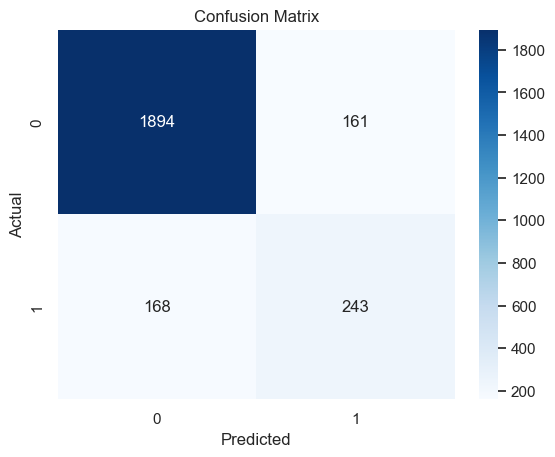

In [80]:
# Confusion Matrix For Logistic Regression

dcm = confusion_matrix(y_test, dtc_pred)

# visualize the confusion matrix
sns.heatmap(dcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [81]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = dtc.predict(X_test)

print('Score of train:', gb.score(X_train, y_train))
print('Score of test:', gb.score(X_test, y_test))
print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, gb_pred))
print('Precision:', precision_score(y_test, gb_pred))
print('Recall:', recall_score(y_test, gb_pred))
print('F1-score:', f1_score(y_test, gb_pred))
print('AUC-ROC:', roc_auc_score(y_test, gb_pred))
# Calculate R-squared score
r2 = r2_score(y_test, gb_pred)
print('R_squared score: ', r2)

Score of train: 0.9197080291970803
Score of test: 0.8925385239253852
Decision Tree Classifier
Accuracy: 0.8665855636658556
Precision: 0.6014851485148515
Recall: 0.5912408759124088
F1-score: 0.5963190184049081
AUC-ROC: 0.7564476885644769
R_squared score:  0.039416058394160625


<function matplotlib.pyplot.show(close=None, block=None)>

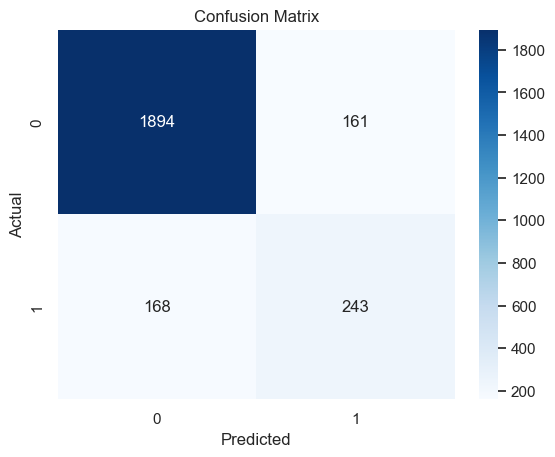

In [82]:
# Confusion Matrix For Logistic Regression

gcm = confusion_matrix(y_test, gb_pred)

# visualize the confusion matrix
sns.heatmap(gcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [83]:
from IPython.display import display, HTML

# Function to hide code cells
def hide_code():
    display(HTML('''
        <script>
            code_show = false;
            function code_toggle() {
                if (code_show) {
                    $('div.input').hide();
                } else {
                    $('div.input').show();
                }
                code_show = !code_show
            }
            $(document).ready(code_toggle);
        </script>
        <form action="javascript:code_toggle()">
            <input type="submit" value="Click here to toggle code on/off">
        </form>
    '''))

# Call the function to hide code cells
hide_code()